<a href="https://colab.research.google.com/github/22MIS1154/DataMining/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# Load our dataset
# Note it should be in same dir


maindf=pd.read_csv('/content/BTC-USD (6).csv')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  3503
Total number of fields present in the dataset:  7


In [ ]:
maindf.shape

(3503, 7)

In [ ]:
maindf.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [ ]:
maindf.tail()

Date          Open          High           Low         Close  \
3498  2024-04-15  65739.648438  66878.648438  62332.070313  63426.210938   
3499  2024-04-16  63419.296875  64355.667969  61716.402344  63811.863281   
3500  2024-04-17  63831.847656  64486.363281  59768.585938  61276.691406   
3501  2024-04-18  61275.316406  64125.687500  60833.480469  63512.753906   
3502  2024-04-19  63509.769531  65434.937500  59698.507813  64196.230469   

         Adj Close       Volume  
3498  63426.210938  43595917654  
3499  63811.863281  42847528078  
3500  61276.691406  41915247049  
3501  63512.753906  36006307335  
3502  64196.230469  49122557952

In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3503 non-null   object 
 1   Open       3503 non-null   float64
 2   High       3503 non-null   float64
 3   Low        3503 non-null   float64
 4   Close      3503 non-null   float64
 5   Adj Close  3503 non-null   float64
 6   Volume     3503 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 191.7+ KB


In [ ]:
maindf.describe()

Open          High           Low         Close     Adj Close  \
count   3503.000000   3503.000000   3503.000000   3503.000000   3503.000000   
mean   15862.640057  16234.357660  15465.095446  15879.581017  15879.581017   
std    17585.866372  18010.016780  17116.274052  17600.420986  17600.420986   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%     1006.930023   1037.169983    983.025512   1009.639984   1009.639984   
50%     8667.577148   8836.841797   8395.107422   8668.120117   8668.120117   
75%    26751.385742  27129.300782  26347.219726  26759.723633  26759.723633   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.503000e+03  
mean   1.712388e+10  
std    1.929255e+10  
min    5.914570e+06  
25%    2.086470e+08  
50%    1.275271e+10  
75%    2.766343e+10  
max    3.509679e+11

In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [ ]:
# Final shape of the dataset after dealing with null values

maindf.shape

(3503, 7)

In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2014-09-17
Ending Date 2024-04-19


In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2014 = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] < '2014-12-31')]

y_2014.drop(y_2014[['Adj Close','Volume']],axis=1)

Date        Open        High         Low       Close
0   2014-09-17  465.864014  468.174011  452.421997  457.334015
1   2014-09-18  456.859985  456.859985  413.104004  424.440002
2   2014-09-19  424.102997  427.834991  384.532013  394.795990
3   2014-09-20  394.673004  423.295990  389.882996  408.903992
4   2014-09-21  408.084991  412.425995  393.181000  398.821014
..         ...         ...         ...         ...         ...
100 2014-12-26  319.152008  331.424011  316.627014  327.924011
101 2014-12-27  327.583008  328.911011  312.630005  315.863007
102 2014-12-28  316.160004  320.028015  311.078003  317.239014
103 2014-12-29  317.700989  320.266998  312.307007  312.670013
104 2014-12-30  312.718994  314.808990  309.372986  310.737000

[105 rows x 5 columns]

In [ ]:
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January           NaN         NaN
February          NaN         NaN
March             NaN         NaN
April             NaN         NaN
May               NaN         NaN
June              NaN         NaN
July              NaN         NaN
August            NaN         NaN
September  412.654003  407.182428
October    365.748000  364.148873
November   364.850235  366.099799
December   344.146864  341.970366

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'],
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2015 = maindf.loc[(maindf['Date'] >= '2015-01-01')
                     & (maindf['Date'] < '2016-01-01')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

Date        Open        High         Low       Close
106 2015-01-01  320.434998  320.434998  314.002991  314.248993
107 2015-01-02  314.079010  315.838989  313.565002  315.032013
108 2015-01-03  314.846008  315.149994  281.082001  281.082001
109 2015-01-04  281.145996  287.230011  257.612000  264.195007
110 2015-01-05  265.084015  278.341003  265.084015  274.473999
..         ...         ...         ...         ...         ...
466 2015-12-27  416.514008  424.006989  408.882996  422.822998
467 2015-12-28  423.342987  429.769012  418.480988  422.278992
468 2015-12-29  422.097992  432.983002  420.627014  432.983002
469 2015-12-30  433.299988  434.386993  422.084015  426.619995
470 2015-12-31  425.875000  432.920990  418.734985  430.566986

[365 rows x 5 columns]

In [ ]:
monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January    251.799905  248.782547
February   232.821856  234.153645
March      269.278419  269.042259
April      235.708667  235.491534
May        237.161806  236.997001
June       236.941433  238.081766
July       278.857679  279.563740
August     252.986774  250.733805
September  233.486733  233.595533
October    262.306000  264.855356
November   346.866833  348.883332
December   422.618033  424.464547

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'],
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2016 = maindf.loc[(maindf['Date'] >= '2016-01-01')
                     & (maindf['Date'] < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

Date        Open        High         Low       Close
471 2016-01-01  430.721008  436.246002  427.515015  434.334015
472 2016-01-02  434.622009  436.062012  431.869995  433.437988
473 2016-01-03  433.578003  433.743011  424.705994  430.010986
474 2016-01-04  430.061005  434.516998  429.084015  433.091003
475 2016-01-05  433.069000  434.182007  429.675995  431.959991
..         ...         ...         ...         ...         ...
832 2016-12-27  908.354004  940.047974  904.255005  933.197998
833 2016-12-28  934.830994  975.921021  934.830994  975.921021
834 2016-12-29  975.125000  979.396973  954.502991  973.497009
835 2016-12-30  972.534973  972.534973  934.833008  961.237976
836 2016-12-31  960.627014  963.742981  947.236023  963.742981

[366 rows x 5 columns]

In [ ]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January    412.805902  410.844485
February   402.304692  404.408274
March      417.262033  416.525774
April      433.487433  434.339398
May        459.237547  461.954415
June       638.544834  642.869061
July       662.977779  661.356103
August     581.238966  579.585197
September  604.614034  605.848633
October    640.702546  643.550935
November   725.073804  726.349101
December   821.108255  828.060356

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2016.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'],
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2017 = maindf.loc[(maindf['Date'] >= '2017-01-01')
                     & (maindf['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
837  2017-01-01    963.658020   1003.080017    958.698975    998.325012
838  2017-01-02    998.617004   1031.390015    996.702026   1021.750000
839  2017-01-03   1021.599976   1044.079956   1021.599976   1043.839966
840  2017-01-04   1044.400024   1159.420044   1044.400024   1154.729980
841  2017-01-05   1156.729980   1191.099976    910.416992   1013.380005
...         ...           ...           ...           ...           ...
1197 2017-12-27  16163.500000  16930.900391  15114.299805  15838.500000
1198 2017-12-28  15864.099609  15888.400391  13937.299805  14606.500000
1199 2017-12-29  14695.799805  15279.000000  14307.000000  14656.200195
1200 2017-12-30  14681.900391  14681.900391  12350.099609  12952.200195
1201 2017-12-31  12897.700195  14377.400391  12755.599609  14156.400391

[365 rows x 5 columns]

In [ ]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January      914.680971    914.916159
February    1055.620071   1062.533672
March       1133.212576   1129.365228
April       1197.646997   1206.641007
May         1865.748712   1895.383529
June        2630.573332   2636.204346
July        2509.213233   2519.418386
August      3819.812579   3880.989998
September   4077.400993   4064.836312
October     5291.370007   5360.071604
November    7685.745996   7813.132975
December   15175.219601  15294.270980

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'],
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
1202 2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195
1203 2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609
1204 2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000
1205 2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195
1206 2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000
...         ...           ...           ...           ...           ...
1562 2018-12-27   3854.688477   3874.416992   3645.448486   3654.833496
1563 2018-12-28   3653.131836   3956.135986   3642.632080   3923.918701
1564 2018-12-29   3932.491699   3963.758789   3820.408691   3820.408691
1565 2018-12-30   3822.384766   3901.908936   3797.219238   3865.952637
1566 2018-12-31   3866.839111   3868.742920   3725.867432   3742.700439

[365 rows x 5 columns]

In [ ]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    13212.074219  13085.558090
February    9462.242920   9472.001151
March       9156.591718   9040.557097
April       7963.618311   8033.596631
May         8505.240675   8450.997732
June        6829.257975   6793.507666
July        7101.466450   7146.349987
August      6723.800955   6700.129946
September   6622.821338   6610.675033
October     6494.016491   6485.118747
November    5481.615120   5404.250171
December    3726.475106   3717.488344

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'],
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

Date         Open         High          Low        Close
1567 2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020
1568 2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424
1569 2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211
1570 2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529
1571 2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580
...         ...          ...          ...          ...          ...
1927 2019-12-27  7238.141113  7363.529297  7189.934082  7290.088379
1928 2019-12-28  7289.031250  7399.041016  7286.905273  7317.990234
1929 2019-12-29  7317.647461  7513.948242  7279.865234  7422.652832
1930 2019-12-30  7420.272949  7454.824219  7276.308105  7292.995117
1931 2019-12-31  7294.438965  7335.290039  7169.777832  7193.599121

[365 rows x 5 columns]

In [ ]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January     3709.705645   3701.554963
February    3697.178327   3711.907261
March       3967.740400   3976.069100
April       5136.813314   5178.469434
May         7205.208024   7309.694131
June        9339.480322   9415.900179
July       10691.706055  10669.336158
August     10657.745621  10643.248362
September   9858.141813   9814.067871
October     8382.432129   8411.929168
November    8427.103516   8373.572412
December    7296.351625   7284.013042

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'],
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
1932 2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316
1933 2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215
1934 2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277
1935 2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738
1936 2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383
...         ...           ...           ...           ...           ...
2293 2020-12-27  26439.373047  28288.839844  25922.769531  26272.294922
2294 2020-12-28  26280.822266  27389.111328  26207.640625  27084.808594
2295 2020-12-29  27081.810547  27370.720703  25987.298828  27362.437500
2296 2020-12-30  27360.089844  28937.740234  27360.089844  28840.953125
2297 2020-12-31  28841.574219  29244.876953  28201.992188  29001.720703

[366 rows x 5 columns]

In [ ]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January     8318.949597   8389.270476
February    9656.215113   9630.722185
March       6943.507009   6871.016113
April       7150.611328   7224.477328
May         9237.761530   9263.151745
June        9499.797005   9489.227214
July        9519.383852   9589.899729
August     11639.097215  11652.394185
September  10689.700163  10660.276856
October    11791.307491  11886.978201
November   16450.121647  16645.757422
December   21680.540827  21983.137097

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between SBitcoin open and close price')
fig.show()

In [ ]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
2298 2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344
2299 2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578
2300 2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438
2301 2021-01-04  32810.949219  33440.218750  28722.755859  31971.914063
2302 2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688
...         ...           ...           ...           ...           ...
2657 2021-12-26  50428.691406  51196.378906  49623.105469  50809.515625
2658 2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969
2659 2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469
2660 2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938
2661 2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000

[364 rows x 5 columns]

In [ ]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    34652.961694  34761.649950
February   45874.967216  46306.798968
March      54544.678176  54998.008695
April      57251.256250  57206.720052
May        47105.828503  46443.286668
June       35920.546940  35845.154688
July       34234.212450  34444.973790
August     45516.119834  45709.022682
September  46041.859375  45939.771484
October    57344.743952  57911.970514
November   60857.520313  60621.488802
December   49753.779818  49361.767969

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2022-12-31')]

y_2022.drop(y_2015[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
2663 2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500
2664 2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750
2665 2022-01-03  47343.542969  47510.726563  45835.964844  46458.117188
2666 2022-01-04  46458.851563  47406.546875  45752.464844  45897.574219
2667 2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906
...         ...           ...           ...           ...           ...
3022 2022-12-26  16842.250000  16920.123047  16812.369141  16919.804688
3023 2022-12-27  16919.291016  16959.845703  16642.072266  16717.173828
3024 2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266
3025 2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797
3026 2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938

[364 rows x 5 columns]

In [ ]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    41368.073463  41114.422379
February   40591.103934  40763.474051
March      41889.148438  41966.237525
April      41694.653646  41435.319662
May        31900.711127  31706.105217
June       24783.338477  24383.685482
July       21424.733052  21539.253843
August     22471.866557  22366.266318
September  19821.353711  19804.779232
October    19616.090285  19650.525643
November   17711.480599  17600.814323
December   16981.775651  16963.012565

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01')
                     & (maindf['Date'] < '2023-12-19')]

y_2023.drop(y_2015[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
3028 2023-01-01  16547.914063  16630.439453  16521.234375  16625.080078
3029 2023-01-02  16625.509766  16759.343750  16572.228516  16688.470703
3030 2023-01-03  16688.847656  16760.447266  16622.371094  16679.857422
3031 2023-01-04  16680.205078  16964.585938  16667.763672  16863.238281
3032 2023-01-05  16863.472656  16884.021484  16790.283203  16836.736328
...         ...           ...           ...           ...           ...
3375 2023-12-14  42884.261719  43390.859375  41767.089844  43023.972656
3376 2023-12-15  43028.250000  43087.824219  41692.968750  41929.757813
3377 2023-12-16  41937.742188  42664.945313  41723.113281  42240.117188
3378 2023-12-17  42236.109375  42359.496094  41274.542969  41364.664063
3379 2023-12-18  41348.203125  42720.296875  40530.257813  42623.539063

[352 rows x 5 columns]

In [ ]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    20043.860131  20250.717490
February   23304.086007  23304.539202
March      24945.340411  25116.900895
April      28823.841732  28857.574544
May        27562.723160  27499.307145
June       27651.926758  27763.198438
July       30098.767578  30057.469947
August     27959.756615  27852.792843
September  26271.268229  26306.136393
October    29511.811114  29755.895161
November   36491.666667  36596.164844
December   41934.937066  42204.581163

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['SBitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'],
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2024 = maindf.loc[(maindf['Date'] >= '2024-01-01')
                     & (maindf['Date'] < '2024-04-09')]

y_2024.drop(y_2015[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
3393 2024-01-01  42280.234375  44175.437500  42214.976563  44167.332031
3394 2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750
3395 2024-01-03  44961.601563  45503.242188  40813.535156  42848.175781
3396 2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875
3397 2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406
...         ...           ...           ...           ...           ...
3487 2024-04-04  65975.695313  69291.257813  65113.796875  68508.843750
3488 2024-04-05  68515.757813  68725.757813  66011.476563  67837.640625
3489 2024-04-06  67840.570313  69629.601563  67491.718750  68896.109375
3490 2024-04-07  68897.109375  70284.429688  68851.632813  69362.554688
3491 2024-04-08  69362.554688  72715.359375  69064.242188  71631.359375

[99 rows x 5 columns]

In [ ]:
monthvise= y_2024.groupby(y_2024['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    42910.015373  42919.612399
February   49231.727101  49875.174300
March      67372.752394  67702.439264
April      68384.608399  68420.805176
May                 NaN           NaN
June                NaN           NaN
July                NaN           NaN
August              NaN           NaN
September           NaN           NaN
October             NaN           NaN
November            NaN           NaN
December            NaN           NaN

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2024.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2024, x=y_2024.Date, y=[y_2024['Open'], y_2024['Close'],
                                          y_2024['High'], y_2024['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2024-04-09')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
0    2014-09-17    465.864014    468.174011    452.421997    457.334015
1    2014-09-18    456.859985    456.859985    413.104004    424.440002
2    2014-09-19    424.102997    427.834991    384.532013    394.795990
3    2014-09-20    394.673004    423.295990    389.882996    408.903992
4    2014-09-21    408.084991    412.425995    393.181000    398.821014
...         ...           ...           ...           ...           ...
3488 2024-04-05  68515.757813  68725.757813  66011.476563  67837.640625
3489 2024-04-06  67840.570313  69629.601563  67491.718750  68896.109375
3490 2024-04-07  68897.109375  70284.429688  68851.632813  69362.554688
3491 2024-04-08  69362.554688  72715.359375  69064.242188  71631.359375
3492 2024-04-09  71632.500000  71742.507813  68212.921875  69139.015625

[3493 rows x 5 columns]

In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    16579.492690  16579.732894
February   18365.801165  18492.403748
March      21063.951157  21148.616195
April      18334.546586  18318.581881
May        14897.735676  14807.430843
June       13058.934120  13023.092093
July       12946.813125  12989.735743
August     14402.491680  14403.907037
September  13142.241365  13122.887938
October    13970.052801  14073.504420
November   15454.204473  15449.651318
December   15850.682874  15863.241374

In [ ]:
names = cycle(['Bitcoin Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Lets First Take all the Close Price
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3503, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2024', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1155


In [ ]:
closedf

Date         Close
2348 2021-02-20  56099.519531
2349 2021-02-21  57539.945313
2350 2021-02-22  54207.320313
2351 2021-02-23  48824.425781
2352 2021-02-24  49705.332031
...         ...           ...
3498 2024-04-15  63426.210938
3499 2024-04-16  63811.863281
3500 2024-04-17  61276.691406
3501 2024-04-18  63512.753906
3502 2024-04-19  64196.230469

[1155 rows x 2 columns]

In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1155, 1)


In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (693, 1)
test_data:  (462, 1)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (677, 15)
y_train:  (677,)
X_test:  (446, 15)
y_test (446,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (677, 15, 1)
X_test:  (446, 15, 1)


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
22/22 [==============================] - 2s 23ms/step - loss: 0.1858 - val_loss: 0.1222
Epoch 2/200
22/22 [==============================] - 0s 10ms/step - loss: 0.1017 - val_loss: 0.0519
Epoch 3/200
22/22 [==============================] - 0s 10ms/step - loss: 0.0325 - val_loss: 0.0073
Epoch 4/200
22/22 [==============================] - 0s 11ms/step - loss: 0.0107 - val_loss: 0.0055
Epoch 5/200
22/22 [==============================] - 0s 10ms/step - loss: 0.0085 - val_loss: 0.0042
Epoch 6/200
22/22 [==============================] - 0s 11ms/step - loss: 0.0070 - val_loss: 0.0036
Epoch 7/200
22/22 [==============================] - 0s 11ms/step - loss: 0.0061 - val_loss: 0.0035
Epoch 8/200
22/22 [==============================] - 0s 11ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 9/200
22/22 [==============================] - 0s 11ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 10/200
22/22 [==============================] - 0s 10ms/step - loss: 0.0048 - val_loss: 0.0035

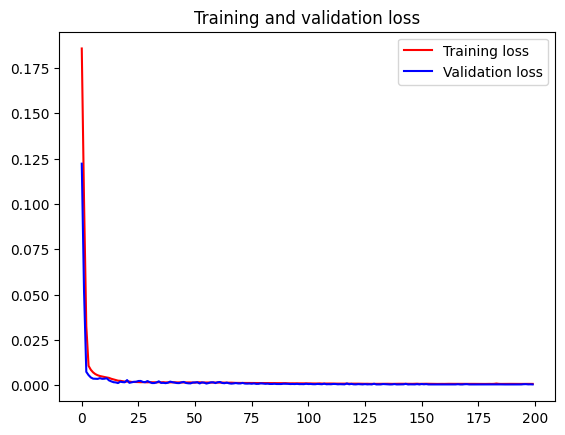

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

14/14 [==============================] - 0s 3ms/step


((677, 1), (446, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1543.2064341481912
Train data MSE:  2381486.0983963753
Train data MAE:  1072.96557217476
-------------------------------------------------------------------------------------
Test data RMSE:  1149.7207071372209
Test data MSE:  1321857.7044201114
Test data MAE:  734.8453965445627


In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.989486750506095
Test data explained variance regression score: 0.9930291602917923


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9885363722944115
Test data R2 score: 0.9926955531666765


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0014860653205933752
Test data MGD:  0.0007159253711546142
----------------------------------------------------------------------
Train data MPD:  56.308940684480156
Test data MPD:  28.35430617237254


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Bitcoin price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1155, 1)
Test predicted data:  (1155, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Bitcoin price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing Bitcoin price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Bitcoin')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### static data (optional)
1m candles from 12/25/22

In [ ]:
static_data = [[1671972960000,"16823.83000000","16824.23000000","16823.10000000","16823.89000000","20.90931000",1671973019999,"351771.27872510",1147,"10.07264000","169459.98076730","0"],[1671973020000,"16823.60000000","16824.11000000","16818.01000000","16819.12000000","185.85984000",1671973079999,"3126295.77125840",3932,"79.31970000","1334216.24734420","0"],[1671973080000,"16819.12000000","16819.75000000","16816.01000000","16817.05000000","109.27313000",1671973139999,"1837760.35137200",2381,"50.04787000","841716.88826160","0"],[1671973140000,"16817.05000000","16819.69000000","16816.01000000","16818.25000000","89.47206000",1671973199999,"1504728.51067290",2832,"51.64540000","868572.51314340","0"],[1671973200000,"16818.68000000","16821.07000000","16818.09000000","16820.87000000","56.85883000",1671973259999,"956354.42267450",1955,"33.91081000","570374.55556500","0"],[1671973260000,"16820.87000000","16821.03000000","16818.13000000","16818.96000000","51.43267000",1671973319999,"865087.44665870",2006,"19.69484000","331263.05782620","0"],[1671973320000,"16818.96000000","16819.88000000","16818.08000000","16818.71000000","38.62553000",1671973379999,"649643.15097000",1793,"18.82526000","316625.56108450","0"],[1671973380000,"16818.88000000","16819.92000000","16818.25000000","16819.74000000","34.01915000",1671973439999,"572169.51286980",1249,"23.56069000","396270.97245090","0"],[1671973440000,"16819.44000000","16820.17000000","16818.37000000","16819.63000000","36.63510000",1671973499999,"616177.22708020",1311,"20.31379000","341667.06574670","0"],[1671973500000,"16819.99000000","16820.59000000","16818.28000000","16819.20000000","49.00971000",1671973559999,"824317.49202180",1686,"24.42451000","410813.27426300","0"],[1671973560000,"16818.98000000","16820.44000000","16818.10000000","16820.33000000","36.23540000",1671973619999,"609454.81615610",1333,"20.70946000","348321.51912690","0"],[1671973620000,"16820.33000000","16821.14000000","16819.08000000","16819.48000000","25.47989000",1671973679999,"428571.76102810",1275,"11.58528000","194867.89820880","0"],[1671973680000,"16819.27000000","16819.95000000","16817.94000000","16818.36000000","45.12071000",1671973739999,"758872.52623760",1381,"19.65079000","330501.73308860","0"],[1671973740000,"16818.22000000","16819.27000000","16817.43000000","16818.36000000","56.82821000",1671973799999,"955748.08606360",1804,"34.53163000","580760.99877070","0"],[1671973800000,"16818.21000000","16821.37000000","16818.15000000","16820.50000000","74.30723000",1671973859999,"1249791.69083410",2262,"49.50781000","832692.89983990","0"],[1671973860000,"16820.08000000","16820.50000000","16818.13000000","16818.71000000","56.27873000",1671973919999,"946558.32098530",1928,"24.77466000","416689.71236440","0"],[1671973920000,"16818.71000000","16819.95000000","16817.73000000","16818.20000000","67.08917000",1671973979999,"1128349.78744070",2227,"28.70520000","482789.93948200","0"],[1671973980000,"16818.20000000","16818.57000000","16817.23000000","16818.35000000","21.31051000",1671974039999,"358402.44349560",947,"9.64845000","162269.01875610","0"],[1671974040000,"16818.35000000","16820.63000000","16817.92000000","16818.67000000","67.54296000",1671974099999,"1136044.32016380",2268,"34.11284000","573766.51059660","0"],[1671974100000,"16818.41000000","16822.48000000","16818.41000000","16820.91000000","82.39114000",1671974159999,"1385864.05938690",2791,"43.29399000","728226.30919380","0"],[1671974160000,"16821.17000000","16823.04000000","16820.72000000","16821.84000000","52.74269000",1671974219999,"887235.42146800",1543,"34.21859000","575627.47734790","0"],[1671974220000,"16821.84000000","16822.10000000","16820.11000000","16820.79000000","59.80593000",1671974279999,"1006002.20057410",2087,"28.42606000","478162.22948780","0"],[1671974280000,"16820.79000000","16821.51000000","16819.50000000","16820.86000000","57.89225000",1671974339999,"973772.95857030",2256,"28.43963000","478371.86078100","0"],[1671974340000,"16820.86000000","16821.37000000","16820.38000000","16820.81000000","18.33191000",1671974399999,"308360.72137390",1152,"9.54453000","160549.37047030","0"],[1671974400000,"16820.81000000","16822.00000000","16820.32000000","16821.66000000","41.11156000",1671974459999,"691541.76619790",1583,"28.09919000","472661.93636270","0"],[1671974460000,"16821.82000000","16821.96000000","16819.92000000","16821.00000000","78.26126000",1671974519999,"1316418.97969480",2298,"35.81572000","602454.42245280","0"],[1671974520000,"16821.17000000","16822.19000000","16820.83000000","16821.55000000","38.22534000",1671974579999,"643008.25525520",1308,"24.33415000","409339.84632980","0"],[1671974580000,"16821.55000000","16821.84000000","16820.61000000","16821.07000000","65.84958000",1671974639999,"1107672.97117720",2136,"32.66963000","549548.36588080","0"],[1671974640000,"16821.07000000","16821.37000000","16820.52000000","16820.96000000","37.80084000",1671974699999,"635849.65724860",1223,"17.02421000","286366.49800500","0"],[1671974700000,"16820.96000000","16821.37000000","16819.74000000","16820.98000000","78.58149000",1671974759999,"1321779.42914810",1693,"32.28549000","543062.73297220","0"],[1671974760000,"16820.98000000","16821.37000000","16819.36000000","16820.20000000","104.44489000",1671974819999,"1756810.40883930",2539,"43.87606000","738021.64618520","0"],[1671974820000,"16820.20000000","16820.53000000","16817.00000000","16818.59000000","106.09221000",1671974879999,"1784307.52891260",2701,"46.35872000","779686.76740270","0"],[1671974880000,"16818.59000000","16822.63000000","16816.90000000","16817.26000000","128.08867000",1671974939999,"2154346.04227080",3231,"61.21845000","1029663.43227160","0"],[1671974940000,"16817.68000000","16818.86000000","16816.48000000","16817.18000000","149.27330000",1671974999999,"2510436.01133680",2944,"60.71341000","1021075.87291730","0"],[1671975000000,"16817.55000000","16818.46000000","16817.00000000","16817.52000000","103.36118000",1671975059999,"1738296.09755830",3026,"52.60486000","884701.49767530","0"],[1671975060000,"16817.52000000","16818.11000000","16815.50000000","16816.54000000","111.07699000",1671975119999,"1867960.66582910",2902,"41.12377000","691583.13038550","0"],[1671975120000,"16816.54000000","16820.77000000","16816.39000000","16817.14000000","74.28696000",1671975179999,"1249365.33158330",2522,"45.68265000","768301.00996080","0"],[1671975180000,"16817.12000000","16818.81000000","16815.60000000","16817.09000000","99.45259000",1671975239999,"1672496.49077320",2803,"49.53595000","833056.83330940","0"],[1671975240000,"16817.18000000","16817.95000000","16813.54000000","16814.95000000","122.01758000",1671975299999,"2051836.34003690",3078,"41.25136000","693696.88991910","0"],[1671975300000,"16814.63000000","16819.40000000","16813.90000000","16814.27000000","111.18052000",1671975359999,"1869597.82418130",3258,"62.67229000","1053913.31118130","0"],[1671975360000,"16813.91000000","16818.47000000","16813.63000000","16816.51000000","106.72138000",1671975419999,"1794592.84489510",2993,"65.36761000","1099212.73104680","0"],[1671975420000,"16816.51000000","16816.52000000","16813.68000000","16814.06000000","32.98530000",1671975479999,"554638.46977040",1566,"11.23072000","188841.50423050","0"],[1671975480000,"16814.06000000","16817.08000000","16810.00000000","16811.98000000","146.90592000",1671975539999,"2469861.58758470",3112,"59.65276000","1002938.71051210","0"],[1671975540000,"16812.00000000","16815.98000000","16804.40000000","16807.99000000","231.58559000",1671975599999,"3892976.14137600",4575,"114.18268000","1919488.79496230","0"],[1671975600000,"16808.07000000","16814.74000000","16806.38000000","16811.62000000","258.84507000",1671975659999,"4351260.37196970",6420,"143.44791000","2411435.69840870","0"],[1671975660000,"16811.09000000","16811.61000000","16807.72000000","16809.18000000","82.86476000",1671975719999,"1392899.51180500",3194,"37.25422000","626213.80468340","0"],[1671975720000,"16809.23000000","16811.34000000","16807.00000000","16808.14000000","117.43025000",1671975779999,"1973873.81532510",3223,"54.51475000","916341.99674880","0"],[1671975780000,"16808.31000000","16810.28000000","16806.06000000","16807.37000000","114.56886000",1671975839999,"1925667.20665780",3938,"53.70355000","902661.37939270","0"],[1671975840000,"16807.86000000","16808.12000000","16805.19000000","16806.29000000","71.74462000",1671975899999,"1205783.23026680",2534,"34.15691000","574070.94840430","0"],[1671975900000,"16805.89000000","16806.99000000","16800.00000000","16803.95000000","260.93951000",1671975959999,"4384756.56778140",5699,"106.49021000","1789485.26799120","0"],[1671975960000,"16804.51000000","16804.51000000","16800.10000000","16800.82000000","81.74620000",1671976019999,"1373529.11987720",2610,"30.70269000","515880.16194610","0"],[1671976020000,"16801.14000000","16804.95000000","16800.59000000","16801.28000000","98.00818000",1671976079999,"1646773.41669270",3030,"52.38807000","880254.76331770","0"],[1671976080000,"16801.28000000","16805.38000000","16800.89000000","16802.82000000","99.29534000",1671976139999,"1668447.42110530",2959,"63.05213000","1059472.25692150","0"],[1671976140000,"16802.81000000","16805.95000000","16801.72000000","16804.84000000","110.34407000",1671976199999,"1854193.98265310",2988,"55.88383000","939076.19504490","0"],[1671976200000,"16804.84000000","16805.27000000","16801.61000000","16802.70000000","68.99426000",1671976259999,"1159363.09116310",2014,"28.05651000","471464.21156980","0"],[1671976260000,"16802.70000000","16804.97000000","16801.24000000","16802.84000000","85.73873000",1671976319999,"1440635.70157700",2278,"39.31330000","660576.94046180","0"],[1671976320000,"16802.84000000","16806.94000000","16802.70000000","16805.84000000","73.54512000",1671976379999,"1235940.62671660",2118,"41.79640000","702401.38541460","0"],[1671976380000,"16805.76000000","16806.91000000","16804.57000000","16805.54000000","62.34639000",1671976439999,"1047787.95837580",2123,"24.57527000","413015.42038690","0"],[1671976440000,"16805.54000000","16805.71000000","16803.90000000","16805.24000000","55.68329000",1671976499999,"935753.11162510",1508,"29.71550000","499371.66811420","0"],[1671976500000,"16804.88000000","16805.68000000","16804.00000000","16805.24000000","36.22023000",1671976559999,"608676.86609740",1299,"17.17808000","288677.89612970","0"],[1671976560000,"16804.98000000","16805.99000000","16804.58000000","16804.98000000","38.54446000",1671976619999,"647750.72172320",1177,"24.68953000","414916.65216370","0"],[1671976620000,"16804.98000000","16807.56000000","16804.83000000","16807.52000000","39.70112000",1671976679999,"667230.52031580",1520,"25.91179000","435482.44593680","0"],[1671976680000,"16807.23000000","16810.99000000","16806.95000000","16810.39000000","106.88690000",1671976739999,"1796676.79347980",2710,"65.18898000","1095780.34060370","0"],[1671976740000,"16810.39000000","16812.76000000","16810.12000000","16811.53000000","85.88499000",1671976799999,"1443860.55754860",2342,"48.43115000","814204.34169780","0"],[1671976800000,"16811.82000000","16812.70000000","16810.61000000","16811.37000000","57.84357000",1671976859999,"972447.19225390",1910,"31.04620000","521943.79206190","0"],[1671976860000,"16811.46000000","16812.84000000","16810.65000000","16810.80000000","52.34023000",1671976919999,"879921.54734080",1697,"20.55310000","345534.91348490","0"],[1671976920000,"16810.80000000","16811.77000000","16810.36000000","16811.44000000","33.17307000",1671976979999,"557671.03484390",1194,"16.87316000","283656.13043300","0"],[1671976980000,"16811.44000000","16811.80000000","16810.42000000","16811.12000000","40.00770000",1671977039999,"672574.78768200",999,"24.10841000","405292.09609160","0"],[1671977040000,"16811.45000000","16811.68000000","16808.88000000","16809.61000000","63.59621000",1671977099999,"1069079.43489880",1345,"19.04698000","320192.94251700","0"],[1671977100000,"16809.61000000","16810.37000000","16808.37000000","16808.83000000","34.99631000",1671977159999,"588265.53810930",1174,"13.92155000","234015.19475360","0"],[1671977160000,"16809.18000000","16810.13000000","16807.93000000","16808.22000000","60.76421000",1671977219999,"1021390.49913830",1672,"28.56465000","480150.39076420","0"],[1671977220000,"16808.23000000","16811.45000000","16808.23000000","16811.08000000","46.27783000",1671977279999,"777930.09721250",1385,"26.77287000","450050.96203000","0"],[1671977280000,"16810.80000000","16811.44000000","16807.08000000","16807.70000000","85.75654000",1671977339999,"1441510.10231780",2048,"31.78037000","534215.61079520","0"],[1671977340000,"16807.73000000","16808.40000000","16806.93000000","16807.31000000","40.43820000",1671977399999,"679668.22024650",1219,"21.09516000","354561.09570030","0"],[1671977400000,"16807.56000000","16808.26000000","16806.64000000","16807.03000000","41.89636000",1671977459999,"704170.12807660",1319,"20.41682000","343159.59785960","0"],[1671977460000,"16807.03000000","16807.42000000","16805.35000000","16805.69000000","46.20701000",1671977519999,"776572.13458210",1278,"20.36327000","342237.37620520","0"],[1671977520000,"16805.69000000","16807.51000000","16805.40000000","16806.40000000","50.88919000",1671977579999,"855262.97392140",1555,"30.32593000","509671.94570820","0"],[1671977580000,"16806.64000000","16807.00000000","16805.43000000","16807.00000000","56.03828000",1671977639999,"941797.39404730",1572,"35.20387000","591651.92667580","0"],[1671977640000,"16807.00000000","16807.14000000","16805.35000000","16806.63000000","49.03476000",1671977699999,"824086.97892150",1548,"20.41816000","343152.24113450","0"],[1671977700000,"16806.33000000","16807.16000000","16806.00000000","16807.09000000","32.73303000",1671977759999,"550133.02470790",1351,"18.64730000","313400.75412920","0"],[1671977760000,"16807.09000000","16807.62000000","16805.85000000","16806.08000000","34.41367000",1671977819999,"578383.35681810",1331,"18.00648000","302631.89751350","0"],[1671977820000,"16806.41000000","16807.71000000","16805.93000000","16807.23000000","34.08198000",1671977879999,"572820.42683010",1438,"20.07833000","337459.22744930","0"],[1671977880000,"16807.23000000","16808.58000000","16806.57000000","16807.36000000","71.15288000",1671977939999,"1195918.82358740",1968,"37.36870000","628087.74814820","0"],[1671977940000,"16807.36000000","16808.73000000","16805.86000000","16807.30000000","52.18753000",1671977999999,"877130.89211960",1978,"30.38694000","510726.22296880","0"],[1671978000000,"16807.39000000","16807.98000000","16806.06000000","16806.74000000","54.59797000",1671978059999,"917631.97567910",1846,"27.37552000","460104.91878540","0"],[1671978060000,"16806.34000000","16807.96000000","16805.58000000","16805.91000000","61.14099000",1671978119999,"1027567.43089720",1985,"31.47345000","528964.26295840","0"],[1671978120000,"16806.52000000","16808.49000000","16805.53000000","16807.40000000","73.40044000",1671978179999,"1233653.35979600",2281,"44.77404000","752531.10590930","0"],[1671978180000,"16807.40000000","16808.53000000","16806.43000000","16806.77000000","53.28261000",1671978239999,"895541.03224720",1784,"28.37974000","476994.05834700","0"],[1671978240000,"16806.77000000","16807.99000000","16806.19000000","16807.56000000","35.97377000",1671978299999,"604617.19854810",1373,"20.59213000","346097.77515440","0"],[1671978300000,"16807.31000000","16807.93000000","16806.53000000","16807.09000000","33.12637000",1671978359999,"556759.29004480",1380,"19.45531000","326990.98519290","0"],[1671978360000,"16807.44000000","16808.01000000","16805.97000000","16807.86000000","39.28265000",1671978419999,"660219.75774500",1439,"19.46588000","327164.49715130","0"],[1671978420000,"16807.51000000","16808.59000000","16807.02000000","16808.22000000","33.45186000",1671978479999,"562258.30246780",1591,"21.09439000","354556.38682670","0"],[1671978480000,"16808.22000000","16809.67000000","16807.67000000","16809.34000000","38.99085000",1671978539999,"655380.76803800",1510,"24.99778000","420179.96722910","0"],[1671978540000,"16809.34000000","16809.98000000","16806.78000000","16807.94000000","85.14597000",1671978599999,"1431145.92559280",2429,"45.35983000","762420.81995760","0"],[1671978600000,"16807.94000000","16808.33000000","16807.25000000","16808.08000000","29.12228000",1671978659999,"489480.57897050",1372,"14.03200000","235848.54855950","0"],[1671978660000,"16808.08000000","16808.78000000","16806.88000000","16808.10000000","52.93656000",1671978719999,"889749.17897810",1891,"29.21348000","491020.06001900","0"],[1671978720000,"16808.10000000","16808.92000000","16807.52000000","16808.08000000","66.25032000",1671978779999,"1113544.36884480",2061,"31.90689000","536299.39084400","0"],[1671978780000,"16808.08000000","16808.36000000","16793.28000000","16801.59000000","422.71070000",1671978839999,"7101740.46158020",5767,"179.96301000","3023480.68489430","0"],[1671978840000,"16801.28000000","16804.57000000","16721.00000000","16742.19000000","1832.63465000",1671978899999,"30715663.46934900",22137,"835.06047000","13995853.11474590","0"],[1671978900000,"16742.19000000","16762.09000000","16739.01000000","16751.99000000","868.65131000",1671978959999,"14549952.15925560",14482,"406.98614000","6817078.48939910","0"],[1671978960000,"16751.99000000","16754.59000000","16731.99000000","16750.80000000","501.83254000",1671979019999,"8402396.04585920",9228,"241.86522000","4049696.06587470","0"],[1671979020000,"16749.86000000","16755.16000000","16742.43000000","16746.05000000","324.21926000",1671979079999,"5430223.82158580",6405,"149.62531000","2506061.85278400","0"],[1671979080000,"16746.71000000","16752.44000000","16739.73000000","16751.56000000","278.57944000",1671979139999,"4665224.16402050",6116,"145.53655000","2437263.36886770","0"],[1671979140000,"16751.79000000","16752.68000000","16742.83000000","16748.30000000","268.33006000",1671979199999,"4493925.39662240",5427,"122.15615000","2045878.13862780","0"],[1671979200000,"16748.30000000","16752.57000000","16740.01000000","16751.66000000","298.37467000",1671979259999,"4996469.43607840",6849,"159.14941000","2665125.13127910","0"],[1671979260000,"16752.48000000","16753.05000000","16744.00000000","16750.05000000","228.48925000",1671979319999,"3826852.39235400",5564,"101.31609000","1696917.65312330","0"],[1671979320000,"16749.21000000","16764.00000000","16746.15000000","16763.94000000","284.70629000",1671979379999,"4770374.23983470",7105,"157.13422000","2632889.13875730","0"],[1671979380000,"16763.73000000","16808.85000000","16762.88000000","16788.05000000","670.30296000",1671979439999,"11254113.06599420",12627,"312.36236000","5244322.38050310","0"],[1671979440000,"16787.23000000","16806.42000000","16783.34000000","16800.59000000","393.40147000",1671979499999,"6608257.19887960",7370,"204.31413000","3432003.15158960","0"],[1671979500000,"16800.59000000","16801.66000000","16782.32000000","16783.35000000","267.05523000",1671979559999,"4484084.40816310",5533,"112.33770000","1886295.46923250","0"],[1671979560000,"16782.53000000","16790.04000000","16777.47000000","16777.77000000","208.54057000",1671979619999,"3500029.70339570",4518,"98.89337000","1659804.31779150","0"],[1671979620000,"16777.77000000","16788.74000000","16772.43000000","16784.27000000","252.23998000",1671979679999,"4232495.36507970",5554,"133.71602000","2243699.78131330","0"],[1671979680000,"16784.27000000","16785.70000000","16772.50000000","16775.55000000","140.01028000",1671979739999,"2349148.67515090",3549,"61.90918000","1038722.50100740","0"],[1671979740000,"16775.23000000","16778.54000000","16774.03000000","16775.52000000","106.54308000",1671979799999,"1787355.96289470",3852,"48.23915000","809271.55603570","0"],[1671979800000,"16775.01000000","16777.55000000","16766.93000000","16768.67000000","294.93468000",1671979859999,"4946745.34898330",5462,"152.37154000","2555743.28641340","0"],[1671979860000,"16768.67000000","16776.11000000","16764.05000000","16774.08000000","190.70726000",1671979919999,"3197953.56182000",4606,"81.33871000","1364017.35954670","0"],[1671979920000,"16774.08000000","16781.18000000","16772.50000000","16777.72000000","139.49029000",1671979979999,"2340301.87059000",4729,"67.80666000","1137630.42937240","0"],[1671979980000,"16777.23000000","16780.00000000","16776.13000000","16779.29000000","165.80514000",1671980039999,"2782059.59061150",3587,"100.65113000","1688868.15164070","0"],[1671980040000,"16779.29000000","16793.73000000","16779.28000000","16788.06000000","275.03982000",1671980099999,"4617142.91108200",5041,"126.66855000","2126353.48575750","0"],[1671980100000,"16787.50000000","16789.20000000","16783.45000000","16784.30000000","100.92934000",1671980159999,"1694159.06283280",3393,"52.37490000","879157.99431740","0"],[1671980160000,"16783.80000000","16792.96000000","16783.20000000","16792.92000000","202.84318000",1671980219999,"3405451.44838670",4278,"111.68575000","1875031.74995720","0"],[1671980220000,"16792.92000000","16806.88000000","16790.35000000","16805.94000000","325.55318000",1671980279999,"5468865.36553250",5049,"169.99618000","2855756.50839640","0"],[1671980280000,"16805.57000000","16832.20000000","16804.83000000","16812.98000000","673.18178000",1671980339999,"11323580.06912980",12915,"349.52171000","5879382.30650560","0"],[1671980340000,"16812.19000000","16832.99000000","16809.00000000","16828.68000000","745.50935000",1671980399999,"12543196.61931380",11635,"384.08211000","6462082.31918450","0"],[1671980400000,"16828.68000000","16830.56000000","16814.24000000","16819.07000000","488.20460000",1671980459999,"8211848.30648470",7341,"212.61916000","3576460.78081970","0"],[1671980460000,"16819.07000000","16839.71000000","16817.00000000","16838.60000000","498.48945000",1671980519999,"8388548.86418280",8459,"275.46806000","4635773.28977170","0"],[1671980520000,"16838.18000000","16839.98000000","16827.24000000","16837.79000000","336.96547000",1671980579999,"5672490.02305930",7306,"135.60019000","2282728.88080910","0"],[1671980580000,"16837.32000000","16844.93000000","16833.27000000","16841.82000000","359.48460000",1671980639999,"6053648.75513010",7768,"171.93331000","2895378.23571210","0"],[1671980640000,"16842.65000000","16857.96000000","16840.95000000","16846.41000000","530.90030000",1671980699999,"8945299.38637540",10125,"273.40188000","4606687.02394610","0"],[1671980700000,"16846.41000000","16855.00000000","16841.55000000","16853.80000000","235.39570000",1671980759999,"3965470.88678920",5543,"117.96544000","1987299.00444140","0"],[1671980760000,"16854.29000000","16855.00000000","16839.65000000","16840.84000000","174.53156000",1671980819999,"2940607.58081210",4783,"68.95962000","1161913.44339510","0"],[1671980820000,"16840.98000000","16854.04000000","16839.00000000","16844.09000000","342.40283000",1671980879999,"5768162.67904640",5888,"138.81887000","2338517.93306090","0"],[1671980880000,"16844.10000000","16856.15000000","16843.81000000","16846.27000000","310.14528000",1671980939999,"5226159.46682530",5850,"125.84344000","2120533.72458550","0"],[1671980940000,"16846.27000000","16851.64000000","16844.81000000","16847.45000000","171.60212000",1671980999999,"2891275.62719090",4154,"99.27941000","1672772.38668830","0"],[1671981000000,"16848.20000000","16849.24000000","16842.22000000","16842.83000000","140.87613000",1671981059999,"2373109.11907360",3580,"58.05409000","977963.48103450","0"],[1671981060000,"16842.83000000","16843.18000000","16833.01000000","16833.67000000","201.34995000",1671981119999,"3390458.23646120",4376,"85.77044000","1444283.99943830","0"],[1671981120000,"16834.62000000","16839.20000000","16828.88000000","16838.42000000","209.01915000",1671981179999,"3518606.72411910",4620,"111.07406000","1869839.73992870","0"],[1671981180000,"16837.94000000","16840.27000000","16828.12000000","16829.27000000","205.34646000",1671981239999,"3456867.66763280",4368,"74.96970000","1262110.07256690","0"],[1671981240000,"16829.27000000","16831.78000000","16825.00000000","16827.24000000","178.45848000",1671981299999,"3003076.32260420",4360,"80.29995000","1351312.07888380","0"],[1671981300000,"16827.24000000","16827.99000000","16818.00000000","16818.67000000","136.96755000",1671981359999,"2304050.89800710",3670,"54.89590000","923456.06732120","0"],[1671981360000,"16818.52000000","16819.89000000","16813.46000000","16817.98000000","132.53301000",1671981419999,"2228780.77760690",3426,"56.32864000","947308.86614670","0"],[1671981420000,"16818.69000000","16819.56000000","16810.41000000","16818.34000000","192.96623000",1671981479999,"3244478.98143120",4641,"90.19006000","1516453.22253070","0"],[1671981480000,"16818.34000000","16824.76000000","16815.97000000","16823.93000000","265.12568000",1671981539999,"4459697.87694050",5035,"132.93856000","2236286.14737080","0"],[1671981540000,"16824.40000000","16836.25000000","16823.50000000","16834.76000000","262.96566000",1671981599999,"4425501.13172110",5290,"151.59169000","2551184.94250450","0"],[1671981600000,"16834.34000000","16840.04000000","16834.25000000","16836.86000000","196.36272000",1671981659999,"3306205.11113900",4028,"94.40007000","1589434.17772430","0"],[1671981660000,"16836.87000000","16841.50000000","16836.46000000","16840.49000000","157.09555000",1671981719999,"2645455.69424000",3720,"84.58020000","1424329.64728650","0"],[1671981720000,"16840.49000000","16841.64000000","16839.00000000","16839.89000000","85.64981000",1671981779999,"1442365.88102670",2370,"27.42556000","461858.68302530","0"],[1671981780000,"16839.89000000","16841.79000000","16832.00000000","16832.98000000","104.95087000",1671981839999,"1767166.88653980",2983,"43.46022000","731802.42410270","0"],[1671981840000,"16832.34000000","16833.64000000","16815.00000000","16824.16000000","272.17166000",1671981899999,"4578810.54720370",4979,"155.16525000","2610357.82024270","0"],[1671981900000,"16825.05000000","16825.29000000","16813.99000000","16816.82000000","160.72489000",1671981959999,"2703034.49636590",3755,"83.16507000","1398612.43520550","0"],[1671981960000,"16816.82000000","16823.60000000","16816.26000000","16819.89000000","128.51295000",1671982019999,"2161599.73652590",3181,"74.23928000","1248694.66994410","0"],[1671982020000,"16819.89000000","16822.01000000","16819.11000000","16820.41000000","64.18597000",1671982079999,"1079640.75523200",2658,"25.14361000","422935.72235510","0"],[1671982080000,"16820.41000000","16822.00000000","16819.52000000","16820.92000000","44.87327000",1671982139999,"754815.81731030",1937,"20.42806000","343621.45121020","0"],[1671982140000,"16820.92000000","16828.67000000","16818.27000000","16828.54000000","113.09272000",1671982199999,"1902559.60588710",2974,"58.90653000","990962.57022900","0"],[1671982200000,"16828.11000000","16835.99000000","16827.19000000","16829.70000000","209.63438000",1671982259999,"3528584.70799540",4096,"95.52892000","1607955.45822290","0"],[1671982260000,"16829.70000000","16832.49000000","16825.01000000","16826.14000000","154.12605000",1671982319999,"2593942.67798200",3214,"59.15647000","995631.05255870","0"],[1671982320000,"16825.86000000","16827.90000000","16823.40000000","16826.81000000","137.46175000",1671982379999,"2312865.03738000",2925,"74.92885000","1260728.51290800","0"],[1671982380000,"16826.81000000","16828.00000000","16824.29000000","16825.20000000","73.08075000",1671982439999,"1229678.70619090",2316,"25.20401000","424099.54416090","0"],[1671982440000,"16825.20000000","16826.55000000","16823.28000000","16825.00000000","59.44301000",1671982499999,"1000124.60425240",2417,"28.28009000","475817.45632570","0"],[1671982500000,"16825.20000000","16825.70000000","16822.16000000","16823.29000000","54.35046000",1671982559999,"914386.02508460",2247,"21.84893000","367589.04878210","0"],[1671982560000,"16823.29000000","16825.09000000","16822.52000000","16824.46000000","61.77482000",1671982619999,"1039282.35013430",2335,"34.95436000","588073.42846540","0"],[1671982620000,"16824.20000000","16825.00000000","16811.65000000","16813.00000000","297.57603000",1671982679999,"5004329.01574010",4981,"112.90941000","1898788.83251430","0"],[1671982680000,"16813.55000000","16813.73000000","16805.40000000","16806.44000000","235.95461000",1671982739999,"3966272.98523480",4899,"111.66178000","1877017.04449450","0"],[1671982740000,"16806.44000000","16811.00000000","16805.21000000","16809.55000000","180.06095000",1671982799999,"3026501.95292600",3759,"106.73585000","1794065.78375820","0"],[1671982800000,"16809.06000000","16810.34000000","16806.83000000","16808.87000000","119.12685000",1671982859999,"2002282.82019910",3105,"79.45361000","1335456.55034150","0"],[1671982860000,"16808.87000000","16809.00000000","16804.32000000","16804.75000000","113.11955000",1671982919999,"1901096.75744410",3764,"47.66515000","801080.19442940","0"],[1671982920000,"16805.33000000","16805.41000000","16787.70000000","16788.99000000","330.46495000",1671982979999,"5551454.47644350",6264,"141.69105000","2380365.84565140","0"],[1671982980000,"16789.66000000","16800.32000000","16787.00000000","16797.20000000","171.16676000",1671983039999,"2874756.84621920",4144,"99.15642000","1665267.04418270","0"],[1671983040000,"16797.20000000","16801.65000000","16791.85000000","16797.51000000","139.12361000",1671983099999,"2336918.49296750",3691,"73.18868000","1229390.78906350","0"],[1671983100000,"16797.06000000","16812.12000000","16797.01000000","16810.32000000","203.22975000",1671983159999,"3415399.98034960",4318,"104.29331000","1752620.58836690","0"],[1671983160000,"16810.49000000","16812.49000000","16808.17000000","16811.11000000","145.54775000",1671983219999,"2446734.69293740",3660,"45.32679000","761977.66614900","0"],[1671983220000,"16811.01000000","16815.00000000","16810.10000000","16812.81000000","129.65831000",1671983279999,"2179952.09967560",2883,"63.13407000","1061494.15715490","0"],[1671983280000,"16812.80000000","16813.11000000","16802.24000000","16803.64000000","200.98076000",1671983339999,"3377904.12445810",3841,"70.11559000","1178425.95370590","0"],[1671983340000,"16803.64000000","16804.14000000","16797.59000000","16798.68000000","110.93158000",1671983399999,"1863818.39719020",3148,"51.73669000","869263.56167150","0"],[1671983400000,"16798.36000000","16800.32000000","16794.90000000","16799.12000000","119.09806000",1671983459999,"2000532.45040550",3432,"63.47363000","1066203.28092760","0"],[1671983460000,"16799.03000000","16799.58000000","16793.52000000","16798.68000000","102.10105000",1671983519999,"1714872.19934950",3323,"52.45270000","880987.83883380","0"],[1671983520000,"16798.28000000","16798.95000000","16792.96000000","16795.52000000","88.46300000",1671983579999,"1485865.38378950",2649,"39.73963000","667495.91260180","0"],[1671983580000,"16795.22000000","16797.73000000","16793.99000000","16796.06000000","51.93400000",1671983639999,"872276.47214030",1892,"26.37073000","442928.82196940","0"],[1671983640000,"16796.06000000","16797.76000000","16794.45000000","16797.31000000","59.96197000",1671983699999,"1007134.24176470",2055,"32.52586000","546320.76697300","0"],[1671983700000,"16797.36000000","16797.65000000","16794.28000000","16794.93000000","54.51251000",1671983759999,"915593.53683320",2337,"28.80113000","483749.68402250","0"],[1671983760000,"16795.38000000","16796.36000000","16793.22000000","16793.98000000","76.99984000",1671983819999,"1293199.82350760",2508,"31.67712000","532021.45679700","0"],[1671983820000,"16793.26000000","16809.86000000","16793.24000000","16806.76000000","149.44738000",1671983879999,"2511070.55559230",4926,"96.63660000","1623687.91959910","0"],[1671983880000,"16807.23000000","16807.25000000","16798.88000000","16799.38000000","174.45983000",1671983939999,"2931451.89325080",3316,"77.52986000","1302751.23193690","0"],[1671983940000,"16799.38000000","16800.11000000","16792.43000000","16793.09000000","175.87952000",1671983999999,"2954205.09273350",3164,"106.78177000","1793606.62317070","0"],[1671984000000,"16793.49000000","16794.16000000","16787.04000000","16793.14000000","249.43629000",1671984059999,"4188322.89856380",4641,"132.75560000","2229161.07018260","0"],[1671984060000,"16793.14000000","16793.16000000","16784.86000000","16788.22000000","200.34867000",1671984119999,"3363463.62395820",3534,"91.34588000","1533511.06428640","0"],[1671984120000,"16788.40000000","16791.00000000","16787.76000000","16789.30000000","68.20609000",1671984179999,"1145147.81632350",2076,"38.39133000","644587.30550800","0"],[1671984180000,"16788.86000000","16789.54000000","16785.81000000","16786.20000000","65.63981000",1671984239999,"1101954.16178570",2015,"27.01556000","453542.48673220","0"],[1671984240000,"16787.04000000","16787.70000000","16780.10000000","16782.12000000","148.70475000",1671984299999,"2495793.71959740",4217,"59.59251000","1000207.18266290","0"],[1671984300000,"16782.76000000","16783.76000000","16779.37000000","16780.98000000","123.35907000",1671984359999,"2070139.98881810",3026,"64.87674000","1088735.49412420","0"],[1671984360000,"16780.98000000","16784.53000000","16777.90000000","16784.52000000","108.65443000",1671984419999,"1823350.68751610",3511,"54.97595000","922570.20750200","0"],[1671984420000,"16784.52000000","16784.53000000","16772.47000000","16780.37000000","206.93904000",1671984479999,"3472412.59174540",4765,"102.56185000","1720991.96203320","0"],[1671984480000,"16780.37000000","16783.09000000","16771.70000000","16782.88000000","228.03700000",1671984539999,"3825817.76030350",4589,"106.64455000","1789241.79143120","0"],[1671984540000,"16782.49000000","16794.93000000","16777.32000000","16793.70000000","259.58510000",1671984599999,"4357372.23210520",4578,"140.10578000","2351789.25562230","0"],[1671984600000,"16793.16000000","16795.20000000","16790.31000000","16792.31000000","118.66181000",1671984659999,"1992659.67830690",3167,"57.88665000","972095.91509720","0"],[1671984660000,"16791.78000000","16804.59000000","16791.62000000","16803.37000000","204.00202000",1671984719999,"3427011.10674860",3675,"123.39750000","2072939.40941020","0"],[1671984720000,"16803.99000000","16806.74000000","16801.23000000","16805.58000000","135.60151000",1671984779999,"2278653.12558310",3889,"70.72126000","1188423.15512530","0"],[1671984780000,"16805.58000000","16806.15000000","16803.00000000","16803.27000000","58.57774000",1671984839999,"984372.50534890",1851,"25.52147000","428886.34819740","0"],[1671984840000,"16803.95000000","16803.98000000","16802.00000000","16803.47000000","55.70957000",1671984899999,"936086.20654900",1874,"31.37734000","527239.14987850","0"],[1671984900000,"16803.90000000","16804.98000000","16798.27000000","16800.31000000","97.21793000",1671984959999,"1633351.49391060",2803,"46.18090000","775890.73116210","0"],[1671984960000,"16799.78000000","16800.36000000","16794.89000000","16795.21000000","140.18602000",1671985019999,"2354751.58842230",2539,"78.63506000","1320869.70162210","0"],[1671985020000,"16795.15000000","16796.29000000","16793.66000000","16795.22000000","61.36601000",1671985079999,"1030649.05029300",1399,"34.10608000","572823.64705940","0"],[1671985080000,"16795.01000000","16795.35000000","16792.00000000","16793.56000000","106.97810000",1671985139999,"1796507.74299220",2160,"61.73527000","1036735.37026690","0"],[1671985140000,"16793.56000000","16796.66000000","16788.35000000","16790.99000000","172.06532000",1671985199999,"2889230.86913640",2671,"81.13674000","1362428.05232980","0"],[1671985200000,"16790.71000000","16792.67000000","16789.99000000","16791.64000000","68.76872000",1671985259999,"1154718.89452280",1873,"36.84080000","618606.26330680","0"],[1671985260000,"16791.64000000","16792.34000000","16790.63000000","16791.80000000","56.47428000",1671985319999,"948278.99743630",1152,"18.54925000","311467.77972690","0"],[1671985320000,"16792.20000000","16793.00000000","16790.66000000","16792.58000000","51.58721000",1671985379999,"866243.40052230",1596,"28.54405000","479312.66131150","0"],[1671985380000,"16792.33000000","16793.00000000","16791.88000000","16792.28000000","25.80847000",1671985439999,"433390.95513740",1017,"16.89286000","283677.70277800","0"],[1671985440000,"16792.70000000","16792.99000000","16791.15000000","16792.99000000","30.19410000",1671985499999,"507021.35405780",1278,"16.37027000","274892.42724610","0"],[1671985500000,"16792.65000000","16793.23000000","16790.85000000","16792.03000000","56.87810000",1671985559999,"955098.72309720",1993,"24.07754000","404314.94409090","0"],[1671985560000,"16792.04000000","16796.99000000","16792.04000000","16795.87000000","106.21602000",1671985619999,"1783848.37671390",3009,"55.61947000","934106.30792260","0"],[1671985620000,"16795.87000000","16797.97000000","16791.78000000","16797.56000000","143.81615000",1671985679999,"2415448.05683620",3171,"74.48527000","1251043.56904900","0"],[1671985680000,"16797.14000000","16803.00000000","16796.50000000","16802.66000000","84.65903000",1671985739999,"1422292.91871870",2383,"47.01339000","789834.55255210","0"],[1671985740000,"16803.00000000","16811.51000000","16801.71000000","16810.73000000","150.99583000",1671985799999,"2537776.09223410",3728,"94.20515000","1583323.88820810","0"],[1671985800000,"16811.49000000","16811.54000000","16805.80000000","16806.25000000","119.58246000",1671985859999,"2010026.87189580",3467,"52.02652000","874514.77075370","0"],[1671985860000,"16806.63000000","16812.97000000","16805.53000000","16812.80000000","150.10369000",1671985919999,"2523207.45018620",3398,"80.91044000","1360113.68633130","0"],[1671985920000,"16812.80000000","16818.00000000","16811.33000000","16812.05000000","125.67054000",1671985979999,"2113141.06640510",3253,"61.09286000","1027294.92935280","0"],[1671985980000,"16811.69000000","16814.30000000","16808.80000000","16813.02000000","99.00124000",1671986039999,"1664346.00782460",2626,"54.28692000","912638.09744000","0"],[1671986040000,"16812.76000000","16813.02000000","16807.45000000","16808.00000000","52.14975000",1671986099999,"876625.24030340",1887,"21.74598000","365547.39884530","0"],[1671986100000,"16808.37000000","16809.70000000","16807.70000000","16808.24000000","57.09040000",1671986159999,"959610.86629070",1801,"30.03031000","504770.37677960","0"],[1671986160000,"16808.23000000","16808.23000000","16797.57000000","16799.17000000","161.80759000",1671986219999,"2718740.65539800",3303,"69.91159000","1174649.37667680","0"],[1671986220000,"16798.92000000","16803.65000000","16797.43000000","16798.42000000","111.25771000",1671986279999,"1869153.16547030",2844,"65.29187000","1096921.97409630","0"],[1671986280000,"16798.42000000","16798.89000000","16793.11000000","16794.75000000","131.32837000",1671986339999,"2205761.92686070",2742,"75.02096000","1260033.51539100","0"],[1671986340000,"16794.75000000","16796.07000000","16793.57000000","16794.79000000","63.30445000",1671986399999,"1063178.37407000",1972,"34.42890000","578226.84118190","0"],[1671986400000,"16794.17000000","16804.54000000","16794.07000000","16803.88000000","99.99168000",1671986459999,"1679799.59829800",2606,"65.41640000","1098915.75215170","0"],[1671986460000,"16803.88000000","16803.92000000","16798.69000000","16799.36000000","64.20004000",1671986519999,"1078618.53772410",2280,"30.30424000","509141.71515810","0"],[1671986520000,"16799.56000000","16800.56000000","16798.40000000","16799.52000000","35.96080000",1671986579999,"604119.52416390",1410,"19.20652000","322661.92728440","0"],[1671986580000,"16799.52000000","16801.77000000","16798.76000000","16800.41000000","62.27357000",1671986639999,"1046196.53007310",1666,"44.25653000","743511.80075090","0"],[1671986640000,"16800.41000000","16802.72000000","16800.10000000","16801.48000000","36.05580000",1671986699999,"605786.07284380",1653,"15.93669000","267760.55949410","0"],[1671986700000,"16801.96000000","16803.83000000","16799.22000000","16803.83000000","83.14631000",1671986759999,"1396931.28701490",1864,"33.37842000","560814.73605840","0"],[1671986760000,"16803.39000000","16813.01000000","16803.38000000","16811.71000000","175.21487000",1671986819999,"2945175.07425410",3906,"92.97844000","1562870.63458570","0"],[1671986820000,"16811.71000000","16815.29000000","16810.24000000","16810.44000000","85.70591000",1671986879999,"1440944.83233130",2493,"35.33881000","594154.90773480","0"],[1671986880000,"16810.81000000","16812.01000000","16807.27000000","16811.30000000","79.16217000",1671986939999,"1330710.35471120",2167,"37.53828000","631016.28341620","0"],[1671986940000,"16811.30000000","16814.73000000","16810.00000000","16814.47000000","72.15974000",1671986999999,"1213170.58932830",2158,"28.66895000","482000.05192710","0"],[1671987000000,"16814.47000000","16816.12000000","16811.00000000","16814.18000000","158.35830000",1671987059999,"2662547.67848510",3501,"67.71081000","1138478.80372940","0"],[1671987060000,"16814.18000000","16815.67000000","16812.01000000","16813.42000000","93.85159000",1671987119999,"1577997.29785210",2674,"46.96531000","789677.11268020","0"],[1671987120000,"16813.42000000","16814.33000000","16812.09000000","16812.80000000","54.97604000",1671987179999,"924330.78315310",1519,"27.42865000","461167.35843170","0"],[1671987180000,"16813.15000000","16820.00000000","16812.78000000","16817.86000000","208.10380000",1671987239999,"3499697.28745410",3418,"118.38505000","1990925.97228460","0"],[1671987240000,"16817.86000000","16821.82000000","16817.14000000","16818.88000000","159.50973000",1671987299999,"2682897.80166680",3188,"91.63960000","1541360.97173320","0"],[1671987300000,"16819.01000000","16819.11000000","16814.49000000","16816.47000000","80.70064000",1671987359999,"1357137.83618220",1844,"28.93427000","486586.34826290","0"],[1671987360000,"16816.12000000","16821.04000000","16816.01000000","16818.23000000","87.61957000",1671987419999,"1473663.22077880",2202,"41.91322000","704923.20350170","0"],[1671987420000,"16818.48000000","16820.68000000","16817.49000000","16820.02000000","97.15679000",1671987479999,"1634140.15404290",2204,"49.94577000","840077.66539670","0"],[1671987480000,"16820.02000000","16820.12000000","16814.18000000","16816.12000000","85.53675000",1671987539999,"1438493.78230330",2094,"29.91218000","503022.73536720","0"],[1671987540000,"16816.53000000","16817.20000000","16814.39000000","16815.96000000","54.27641000",1671987599999,"912701.75148100",1354,"27.64014000","464795.30266760","0"],[1671987600000,"16815.96000000","16816.08000000","16807.69000000","16808.24000000","175.42026000",1671987659999,"2949112.27212870",3686,"84.08568000","1413627.81505350","0"],[1671987660000,"16808.24000000","16808.83000000","16803.80000000","16805.09000000","172.36328000",1671987719999,"2896761.03511250",2786,"81.16044000","1364013.29833620","0"],[1671987720000,"16805.09000000","16808.50000000","16803.54000000","16805.97000000","154.41481000",1671987779999,"2595091.70801450",2652,"99.68457000","1675295.92024820","0"],[1671987780000,"16805.52000000","16811.44000000","16804.74000000","16810.34000000","105.22267000",1671987839999,"1768483.15880970",2254,"65.04583000","1093227.41129930","0"],[1671987840000,"16810.34000000","16810.98000000","16793.93000000","16794.98000000","277.43704000",1671987899999,"4661219.77107550",4196,"166.51239000","2797502.72921150","0"],[1671987900000,"16794.98000000","16801.55000000","16794.00000000","16799.68000000","135.11209000",1671987959999,"2269606.82056940",2715,"84.52034000","1419758.61471770","0"],[1671987960000,"16800.05000000","16801.48000000","16796.28000000","16797.10000000","76.71547000",1671988019999,"1288681.56002220",2484,"33.20381000","557772.44670440","0"],[1671988020000,"16797.49000000","16809.18000000","16796.83000000","16806.75000000","108.37198000",1671988079999,"1820758.05758140",3043,"63.22318000","1062209.00689850","0"],[1671988080000,"16806.75000000","16809.08000000","16806.64000000","16807.98000000","39.56426000",1671988139999,"664987.42049940",1812,"15.62509000","262626.78475880","0"],[1671988140000,"16807.98000000","16808.91000000","16806.33000000","16806.94000000","30.35422000",1671988199999,"510185.11231530",1564,"12.23783000","205694.47570510","0"],[1671988200000,"16806.94000000","16808.30000000","16805.53000000","16806.00000000","40.56130000",1671988259999,"681717.06880370",1554,"22.08526000","371194.94498330","0"],[1671988260000,"16805.94000000","16806.89000000","16803.22000000","16806.09000000","34.93668000",1671988319999,"587110.60241940",1166,"18.25610000","306792.21312840","0"],[1671988320000,"16806.03000000","16813.85000000","16805.80000000","16813.33000000","98.00718000",1671988379999,"1647564.05430050",2317,"58.71382000","987019.62565730","0"],[1671988380000,"16813.30000000","16818.82000000","16811.48000000","16817.14000000","128.59474000",1671988439999,"2162330.44964570",2885,"70.20632000","1180568.06806430","0"],[1671988440000,"16817.30000000","16818.74000000","16814.85000000","16816.28000000","118.57151000",1671988499999,"1994036.70373040",2632,"71.28769000","1198887.55819850","0"],[1671988500000,"16816.28000000","16819.05000000","16815.26000000","16817.70000000","76.85485000",1671988559999,"1292494.58090720",2135,"37.75274000","634909.98928670","0"],[1671988560000,"16817.70000000","16819.00000000","16812.45000000","16813.27000000","74.46040000",1671988619999,"1252070.58728730",2412,"22.32457000","375399.46602340","0"],[1671988620000,"16813.27000000","16816.69000000","16813.07000000","16816.24000000","91.28986000",1671988679999,"1535082.87573090",1723,"57.62788000","969046.47313070","0"],[1671988680000,"16816.24000000","16822.27000000","16814.26000000","16819.12000000","203.72674000",1671988739999,"3426265.20656300",3641,"100.91858000","1697242.64489210","0"],[1671988740000,"16819.85000000","16821.10000000","16817.25000000","16819.83000000","110.96950000",1671988799999,"1866459.44501410",2584,"42.81264000","720093.88632880","0"],[1671988800000,"16819.83000000","16821.32000000","16818.84000000","16819.20000000","94.60730000",1671988859999,"1591277.94492690",2277,"39.08447000","657409.63467910","0"],[1671988860000,"16818.84000000","16819.22000000","16814.00000000","16815.34000000","81.78341000",1671988919999,"1375263.90601920",2292,"39.96417000","672038.87113580","0"],[1671988920000,"16815.34000000","16817.57000000","16815.04000000","16816.67000000","42.12584000",1671988979999,"708393.91894810",1774,"20.65145000","347281.55288540","0"],[1671988980000,"16816.67000000","16817.83000000","16815.25000000","16816.50000000","39.42309000",1671989039999,"662951.52001400",1927,"17.09138000","287418.04117140","0"],[1671989040000,"16816.50000000","16817.04000000","16806.30000000","16806.37000000","218.19267000",1671989099999,"3668331.42566380",3204,"79.12998000","1330388.27925660","0"],[1671989100000,"16806.98000000","16808.69000000","16796.82000000","16802.87000000","206.94523000",1671989159999,"3477358.84632350",3242,"81.31314000","1366388.10100780","0"],[1671989160000,"16802.87000000","16805.39000000","16801.16000000","16801.88000000","81.79726000",1671989219999,"1374451.79187550",2560,"45.01954000","756480.66134270","0"],[1671989220000,"16801.88000000","16802.93000000","16800.52000000","16802.13000000","39.82954000",1671989279999,"669202.25634030",1524,"17.67760000","297016.77690390","0"],[1671989280000,"16802.55000000","16809.51000000","16802.02000000","16807.83000000","90.27897000",1671989339999,"1517313.94248370",2550,"52.78044000","887080.66518140","0"],[1671989340000,"16808.19000000","16809.27000000","16806.66000000","16809.06000000","37.46086000",1671989399999,"629634.31429240",1462,"23.17498000","389523.99151510","0"],[1671989400000,"16809.06000000","16809.59000000","16806.41000000","16807.08000000","35.41065000",1671989459999,"595175.20913870",1486,"14.54909000","244542.22201840","0"],[1671989460000,"16807.08000000","16807.98000000","16806.50000000","16806.96000000","18.44532000",1671989519999,"310012.13928100",938,"8.96850000","150735.65483760","0"],[1671989520000,"16806.52000000","16807.86000000","16805.51000000","16806.53000000","40.67118000",1671989579999,"683543.33121920",1645,"24.30470000","408481.45298310","0"],[1671989580000,"16806.53000000","16807.16000000","16805.22000000","16806.32000000","51.20262000",1671989639999,"860518.09208190",1892,"24.43237000","410619.01396630","0"],[1671989640000,"16806.72000000","16807.27000000","16805.31000000","16806.59000000","39.78967000",1671989699999,"668719.26095230",1796,"19.98833000","335933.74677930","0"],[1671989700000,"16806.91000000","16806.95000000","16803.90000000","16805.05000000","68.59200000",1671989759999,"1152683.77322200",2267,"25.47160000","428055.56409150","0"],[1671989760000,"16804.82000000","16805.55000000","16803.65000000","16805.39000000","30.43196000",1671989819999,"511398.72073720",1363,"16.18502000","271987.24131840","0"],[1671989820000,"16804.99000000","16812.47000000","16804.68000000","16810.56000000","87.82881000",1671989879999,"1476343.39827650",2520,"51.74063000","869716.40587150","0"],[1671989880000,"16810.56000000","16810.56000000","16808.84000000","16809.03000000","20.63625000",1671989939999,"346884.84188480",1137,"10.78845000","181349.48159040","0"],[1671989940000,"16809.03000000","16811.73000000","16809.03000000","16810.42000000","26.41809000",1671989999999,"444099.92047710",1208,"15.47479000","260138.18582720","0"],[1671990000000,"16810.05000000","16810.51000000","16808.63000000","16809.28000000","28.19947000",1671990059999,"474017.19537220",1317,"14.71821000","247405.13463520","0"],[1671990060000,"16808.92000000","16810.19000000","16808.40000000","16809.25000000","34.35363000",1671990119999,"577460.36047230",1592,"19.50308000","327835.76221640","0"],[1671990120000,"16809.25000000","16810.16000000","16808.49000000","16809.38000000","17.11686000",1671990179999,"287722.49947680",945,"9.70919000","163205.88874300","0"],[1671990180000,"16809.68000000","16810.94000000","16806.88000000","16807.65000000","37.38875000",1671990239999,"628452.53957530",1691,"15.98116000","268626.37923210","0"],[1671990240000,"16808.04000000","16808.70000000","16806.17000000","16806.96000000","43.45516000",1671990299999,"730355.49893890",1639,"17.05631000","286670.82847450","0"],[1671990300000,"16806.84000000","16807.87000000","16802.90000000","16802.97000000","87.98562000",1671990359999,"1478610.26259010",2805,"35.94702000","604100.80935650","0"],[1671990360000,"16802.99000000","16805.00000000","16794.92000000","16804.30000000","182.18411000",1671990419999,"3060744.29622760",4162,"96.34321000","1618642.90913010","0"],[1671990420000,"16803.97000000","16804.84000000","16801.14000000","16802.99000000","55.37547000",1671990479999,"930470.43946690",2184,"26.22988000","440742.80420750","0"],[1671990480000,"16803.38000000","16804.67000000","16801.72000000","16802.63000000","57.43203000",1671990539999,"965033.48453640",2426,"27.68069000","465125.02284120","0"],[1671990540000,"16802.63000000","16803.50000000","16798.69000000","16801.51000000","78.35458000",1671990599999,"1316435.12197450",2830,"40.96943000","688326.55363960","0"],[1671990600000,"16801.51000000","16802.39000000","16799.80000000","16799.83000000","64.85067000",1671990659999,"1089560.29390730",2296,"27.20975000","457158.48314400","0"],[1671990660000,"16799.83000000","16800.43000000","16796.56000000","16799.87000000","89.98782000",1671990719999,"1511669.97038450",2562,"46.94629000","788642.63318180","0"],[1671990720000,"16799.87000000","16802.94000000","16798.89000000","16802.37000000","69.87042000",1671990779999,"1173848.34176800",2539,"36.28500000","609608.86315800","0"],[1671990780000,"16802.37000000","16803.26000000","16800.83000000","16802.80000000","40.75901000",1671990839999,"684842.02379450",1998,"19.39363000","325858.71217060","0"],[1671990840000,"16802.80000000","16803.47000000","16801.18000000","16802.46000000","38.96819000",1671990899999,"654754.11615080",1881,"20.41588000","343036.78022840","0"],[1671990900000,"16802.85000000","16802.85000000","16800.00000000","16800.97000000","64.74562000",1671990959999,"1087803.10792530",1954,"26.84192000","450984.89211540","0"],[1671990960000,"16800.97000000","16801.33000000","16800.01000000","16800.40000000","29.98064000",1671991019999,"503696.42628710",1285,"15.80547000","265546.07962300","0"],[1671991020000,"16800.40000000","16800.93000000","16799.10000000","16799.26000000","38.87174000",1671991079999,"653050.29965820",1188,"14.81079000","248826.24572060","0"],[1671991080000,"16799.26000000","16800.41000000","16798.24000000","16799.32000000","40.97392000",1671991139999,"688337.73540060",1403,"17.78631000","298800.49538980","0"],[1671991140000,"16798.98000000","16799.33000000","16792.12000000","16796.35000000","96.54877000",1671991199999,"1621572.33875250",3040,"41.36997000","694820.95408700","0"],[1671991200000,"16796.17000000","16799.77000000","16790.23000000","16798.13000000","142.59406000",1671991259999,"2394728.41309050",3759,"79.57741000","1336445.70636590","0"],[1671991260000,"16798.13000000","16799.30000000","16796.86000000","16797.66000000","28.98238000",1671991319999,"486842.20919940",1240,"11.41406000","191734.40013040","0"],[1671991320000,"16797.66000000","16800.52000000","16796.94000000","16797.96000000","57.06273000",1671991379999,"958576.00013310",1954,"31.18729000","523910.94606620","0"],[1671991380000,"16797.96000000","16799.71000000","16796.56000000","16798.65000000","64.56359000",1671991439999,"1084534.86094380",2058,"34.91264000","586464.64261950","0"],[1671991440000,"16798.65000000","16799.86000000","16795.45000000","16795.64000000","59.93349000",1671991499999,"1006737.04061380",2188,"23.95818000","402450.85404010","0"],[1671991500000,"16796.01000000","16803.75000000","16795.64000000","16800.28000000","121.57513000",1671991559999,"2042462.44025340",2943,"74.53220000","1252136.09959720","0"],[1671991560000,"16800.53000000","16802.25000000","16799.59000000","16801.53000000","47.35907000",1671991619999,"795681.94608360",2071,"27.09417000","455215.55968340","0"],[1671991620000,"16801.53000000","16801.86000000","16798.11000000","16798.79000000","61.21079000",1671991679999,"1028336.25654670",1967,"26.96225000","452966.95005680","0"],[1671991680000,"16798.62000000","16800.19000000","16798.53000000","16799.84000000","42.78431000",1671991739999,"718750.15922080",1645,"21.28853000","357637.75896390","0"],[1671991740000,"16799.84000000","16799.94000000","16796.69000000","16798.05000000","34.31470000",1671991799999,"576428.45823920",1252,"14.32029000","240555.14140820","0"],[1671991800000,"16798.05000000","16798.43000000","16791.25000000","16793.15000000","91.14845000",1671991859999,"1530886.65896230",2290,"32.96847000","553743.67872220","0"],[1671991860000,"16793.15000000","16794.41000000","16785.13000000","16789.52000000","143.79610000",1671991919999,"2414281.70049530",3381,"49.31279000","827955.45686750","0"],[1671991920000,"16789.52000000","16793.61000000","16788.97000000","16791.60000000","81.57407000",1671991979999,"1369709.51163160",2903,"43.29296000","726942.61435950","0"],[1671991980000,"16791.04000000","16792.96000000","16788.65000000","16790.16000000","66.23673000",1671992039999,"1112176.27917500",2550,"28.48027000","478222.21827900","0"],[1671992040000,"16790.58000000","16792.37000000","16789.05000000","16790.94000000","34.19037000",1671992099999,"574087.83485940",1935,"15.36967000","258074.86706470","0"],[1671992100000,"16791.37000000","16792.98000000","16788.20000000","16790.13000000","60.41078000",1671992159999,"1014346.19037500",2467,"31.01918000","520841.13844720","0"],[1671992160000,"16790.13000000","16792.97000000","16788.69000000","16790.01000000","60.11630000",1671992219999,"1009398.02732210",2286,"27.37367000","459622.90473890","0"],[1671992220000,"16789.67000000","16790.01000000","16786.91000000","16788.45000000","40.24400000",1671992279999,"675630.03349270",1591,"15.01558000","252088.67279030","0"],[1671992280000,"16788.45000000","16790.40000000","16786.21000000","16790.25000000","57.04810000",1671992339999,"957736.40080050",1803,"38.26288000","642370.80220430","0"],[1671992340000,"16790.25000000","16794.97000000","16788.98000000","16792.21000000","105.29356000",1671992399999,"1768084.92622610",3068,"50.18709000","842746.00559250","0"],[1671992400000,"16791.81000000","16792.90000000","16788.89000000","16792.20000000","47.63724000",1671992459999,"799888.56786650",1941,"23.88510000","401065.16911830","0"],[1671992460000,"16792.47000000","16795.00000000","16791.39000000","16793.91000000","37.69354000",1671992519999,"632986.89210560",1965,"15.92940000","267503.60090750","0"],[1671992520000,"16793.91000000","16797.00000000","16792.50000000","16795.54000000","80.17215000",1671992579999,"1346451.19877470",2531,"41.67042000","699837.99624720","0"],[1671992580000,"16795.18000000","16797.92000000","16793.18000000","16795.32000000","71.92635000",1671992639999,"1208063.57220260",2586,"37.78954000","634709.24502920","0"],[1671992640000,"16795.73000000","16796.72000000","16793.00000000","16793.89000000","48.04751000",1671992699999,"806955.79513950",2072,"24.10230000","404805.68170200","0"],[1671992700000,"16793.49000000","16793.92000000","16791.40000000","16792.68000000","44.44722000",1671992759999,"746374.41685070",1419,"21.16850000","355469.58376460","0"],[1671992760000,"16792.68000000","16795.41000000","16792.21000000","16793.09000000","47.22189000",1671992819999,"793036.13448040",1864,"28.68103000","481666.46721300","0"],[1671992820000,"16793.09000000","16794.80000000","16792.33000000","16793.55000000","43.40898000",1671992879999,"728992.82330510",1890,"19.40897000","325950.54209380","0"],[1671992880000,"16793.55000000","16796.09000000","16793.11000000","16795.37000000","58.12358000",1671992939999,"976174.08813590",2025,"35.95037000","603783.66307450","0"],[1671992940000,"16795.37000000","16796.29000000","16794.64000000","16795.90000000","31.95931000",1671992999999,"536770.26549910",1613,"16.22071000","272437.92608930","0"],[1671993000000,"16795.52000000","16796.27000000","16793.66000000","16795.33000000","65.41905000",1671993059999,"1098706.52235790",2419,"36.82418000","618462.99603690","0"],[1671993060000,"16795.72000000","16796.85000000","16793.39000000","16795.71000000","62.58303000",1671993119999,"1051102.39295080",2506,"29.88125000","501872.62664940","0"],[1671993120000,"16795.71000000","16798.49000000","16794.00000000","16797.08000000","63.77616000",1671993179999,"1071198.02431190",2056,"37.48254000","629575.00374490","0"],[1671993180000,"16797.08000000","16802.23000000","16797.00000000","16799.29000000","92.08762000",1671993239999,"1547035.46332530",2358,"61.77589000","1037821.43289600","0"],[1671993240000,"16799.68000000","16799.90000000","16796.04000000","16796.65000000","57.61347000",1671993299999,"967784.35134960",1915,"19.75914000","331912.15297230","0"],[1671993300000,"16796.65000000","16797.85000000","16794.02000000","16794.26000000","52.94768000",1671993359999,"889290.78975200",1943,"20.51617000","344587.78242590","0"],[1671993360000,"16794.26000000","16795.17000000","16793.36000000","16794.17000000","28.27569000",1671993419999,"474876.78676620",1081,"13.36354000","224436.23636840","0"],[1671993420000,"16794.17000000","16794.77000000","16792.99000000","16793.42000000","17.28928000",1671993479999,"290352.28586270",782,"9.33709000","156805.88740470","0"],[1671993480000,"16793.42000000","16794.50000000","16793.15000000","16793.64000000","14.34876000",1671993539999,"240972.47136550",808,"8.73876000","146759.42797330","0"],[1671993540000,"16793.64000000","16794.36000000","16792.64000000","16793.60000000","20.31533000",1671993599999,"341166.87823060",854,"11.78631000","197934.59302730","0"],[1671993600000,"16793.95000000","16795.53000000","16793.60000000","16793.75000000","44.55921000",1671993659999,"748342.30799640",1359,"22.66618000","380665.11513560","0"],[1671993660000,"16793.88000000","16795.93000000","16793.16000000","16794.97000000","48.41709000",1671993719999,"813141.83219770",1441,"26.58386000","446468.27053680","0"],[1671993720000,"16795.39000000","16795.90000000","16792.57000000","16795.58000000","55.20368000",1671993779999,"927089.30327580",1642,"28.97899000","486679.83788130","0"],[1671993780000,"16795.19000000","16795.57000000","16792.53000000","16793.14000000","36.52993000",1671993839999,"613460.74235000",1430,"11.97070000","201030.58771350","0"],[1671993840000,"16793.41000000","16794.99000000","16792.30000000","16793.00000000","54.94462000",1671993899999,"922707.24274450",1829,"29.33004000","492558.31598910","0"],[1671993900000,"16793.00000000","16793.60000000","16791.00000000","16791.98000000","34.41337000",1671993959999,"577873.04253560",1472,"14.96712000","251332.28672480","0"],[1671993960000,"16791.98000000","16795.74000000","16791.68000000","16794.25000000","42.76508000",1671994019999,"718206.98729490",1608,"23.77691000","399313.53808600","0"],[1671994020000,"16794.25000000","16794.90000000","16793.15000000","16793.77000000","17.25837000",1671994079999,"289835.16281690",911,"9.60612000","161324.49973920","0"],[1671994080000,"16793.96000000","16795.72000000","16793.68000000","16794.07000000","29.79664000",1671994139999,"500424.82347510",1363,"13.77312000","231317.01886520","0"],[1671994140000,"16794.41000000","16797.04000000","16794.02000000","16795.10000000","38.21661000",1671994199999,"641869.20988890",1308,"23.34829000","392152.61841890","0"],[1671994200000,"16795.10000000","16795.46000000","16794.08000000","16794.38000000","33.89646000",1671994259999,"569284.80603070",1046,"12.50720000","210057.56891280","0"],[1671994260000,"16794.38000000","16794.74000000","16789.99000000","16791.89000000","88.33089000",1671994319999,"1483286.22069510",2431,"40.48923000","679919.58205530","0"],[1671994320000,"16791.89000000","16793.65000000","16790.10000000","16790.91000000","47.74487000",1671994379999,"801729.78357240",1462,"23.32659000","391704.79670170","0"],[1671994380000,"16790.91000000","16792.10000000","16789.68000000","16791.64000000","45.18881000",1671994439999,"758770.13340410",1664,"24.40857000","409850.82772580","0"],[1671994440000,"16791.27000000","16794.20000000","16790.31000000","16793.61000000","55.90836000",1671994499999,"938829.75806330",1924,"32.02641000","537802.14927530","0"],[1671994500000,"16793.61000000","16794.14000000","16791.17000000","16791.52000000","38.06916000",1671994559999,"639294.17463750",1573,"15.14210000","254286.04047700","0"],[1671994560000,"16791.40000000","16791.57000000","16788.98000000","16790.07000000","42.34531000",1671994619999,"710996.44837260",1543,"21.13091000","354799.79853490","0"],[1671994620000,"16790.07000000","16790.75000000","16788.89000000","16790.04000000","53.78677000",1671994679999,"903069.84329340",1525,"23.65297000","397134.31318490","0"],[1671994680000,"16790.04000000","16790.37000000","16782.56000000","16783.12000000","119.39583000",1671994739999,"2004278.50111820",2572,"37.26529000","625582.12300260","0"],[1671994740000,"16783.12000000","16783.90000000","16774.50000000","16779.47000000","173.21184000",1671994799999,"2906335.98032190",3231,"69.82105000","1171540.17876450","0"],[1671994800000,"16779.75000000","16780.31000000","16768.92000000","16771.66000000","179.10322000",1671994859999,"3004308.40412660",4194,"67.94515000","1139715.39124810","0"],[1671994860000,"16771.65000000","16777.27000000","16761.01000000","16765.13000000","424.83191000",1671994919999,"7123927.60574620",7674,"186.99669000","3135761.74285120","0"],[1671994920000,"16764.70000000","16771.91000000","16764.67000000","16770.24000000","128.27430000",1671994979999,"2151120.45157760",2895,"85.23597000","1429371.17100630","0"],[1671994980000,"16770.63000000","16771.21000000","16763.97000000","16764.32000000","63.20892000",1671995039999,"1059860.26380620",2485,"22.63655000","379567.46946380","0"],[1671995040000,"16764.32000000","16766.28000000","16761.35000000","16766.17000000","89.92388000",1671995099999,"1507491.99540460",2592,"54.20166000","908652.58454140","0"],[1671995100000,"16765.73000000","16767.54000000","16748.99000000","16762.92000000","313.94377000",1671995159999,"5261059.98004650",5697,"135.33084000","2268003.52276700","0"],[1671995160000,"16762.92000000","16763.90000000","16755.17000000","16763.25000000","146.69884000",1671995219999,"2458726.17689390",3316,"76.59022000","1283712.19608170","0"],[1671995220000,"16762.67000000","16764.69000000","16759.87000000","16763.07000000","75.56100000",1671995279999,"1266578.75359790",2611,"37.88295000","635020.15402330","0"],[1671995280000,"16762.38000000","16768.93000000","16727.00000000","16760.72000000","854.05969000",1671995339999,"14303985.66402380",12765,"412.66392000","6911583.22460400","0"],[1671995340000,"16761.80000000","16763.63000000","16749.60000000","16751.60000000","199.25043000",1671995399999,"3338842.11621250",4206,"101.22142000","1696164.18515690","0"],[1671995400000,"16752.12000000","16755.12000000","16739.35000000","16748.26000000","215.05192000",1671995459999,"3601386.65200410",4175,"118.20235000","1979517.59054580","0"],[1671995460000,"16747.76000000","16749.36000000","16745.22000000","16746.74000000","65.60329000",1671995519999,"1098706.83016460",2191,"31.36981000","525377.24504290","0"],[1671995520000,"16746.80000000","16757.99000000","16740.45000000","16756.44000000","230.48970000",1671995579999,"3860289.04107260",5188,"123.94392000","2075876.96806830","0"],[1671995580000,"16756.44000000","16759.68000000","16753.22000000","16756.04000000","121.01828000",1671995639999,"2027859.13714870",3670,"61.82708000","1036031.56521210","0"],[1671995640000,"16756.08000000","16764.21000000","16753.05000000","16760.54000000","117.61489000",1671995699999,"1971131.31087080",3324,"68.82300000","1153444.72870890","0"],[1671995700000,"16760.54000000","16761.24000000","16752.92000000","16753.89000000","120.61384000",1671995759999,"2021038.22237580",3253,"52.34026000","877041.11222310","0"],[1671995760000,"16753.89000000","16756.63000000","16750.66000000","16752.98000000","67.59416000",1671995819999,"1132419.03504290",2529,"33.42705000","560016.76664990","0"],[1671995820000,"16752.98000000","16753.43000000","16745.00000000","16749.79000000","140.47301000",1671995879999,"2352778.53017590",3306,"69.44416000","1163131.56657970","0"],[1671995880000,"16748.63000000","16749.79000000","16744.80000000","16745.74000000","78.27009000",1671995939999,"1310782.08719720",2772,"28.20748000","472393.89437730","0"],[1671995940000,"16745.74000000","16753.43000000","16745.56000000","16751.04000000","90.90366000",1671995999999,"1522616.49573670",3141,"50.51491000","846128.49186360","0"],[1671996000000,"16751.34000000","16752.34000000","16746.46000000","16748.47000000","89.55926000",1671996059999,"1500071.74639770",2774,"33.81499000","566408.80814800","0"],[1671996060000,"16748.47000000","16749.32000000","16741.73000000","16745.43000000","136.10058000",1671996119999,"2278928.26073300",3224,"72.68838000","1217109.37197880","0"],[1671996120000,"16745.68000000","16747.16000000","16742.91000000","16746.25000000","77.69800000",1671996179999,"1301063.44271470",2571,"46.43186000","777518.71094130","0"],[1671996180000,"16746.25000000","16748.13000000","16743.01000000","16743.01000000","63.47173000",1671996239999,"1062885.82920670",2273,"26.72443000","447530.41513000","0"],[1671996240000,"16743.32000000","16744.50000000","16736.93000000","16738.24000000","144.08975000",1671996299999,"2412161.60084720",3203,"68.68146000","1149794.50887860","0"],[1671996300000,"16738.24000000","16739.00000000","16731.78000000","16736.27000000","124.47059000",1671996359999,"2082985.63636720",3200,"59.69579000","998999.76239740","0"],[1671996360000,"16735.79000000","16737.59000000","16733.28000000","16737.15000000","79.42767000",1671996419999,"1329294.17345100",2658,"43.88315000","734436.74175150","0"],[1671996420000,"16737.08000000","16747.93000000","16736.44000000","16744.08000000","145.16543000",1671996479999,"2430373.22980440",3922,"87.35079000","1462437.68459580","0"],[1671996480000,"16744.50000000","16747.86000000","16742.54000000","16747.84000000","70.24903000",1671996539999,"1176317.04028180",2732,"44.61238000","747040.48216440","0"],[1671996540000,"16747.09000000","16765.84000000","16745.98000000","16748.55000000","377.79048000",1671996599999,"6330456.81547610",8375,"193.69922000","3245704.51569290","0"],[1671996600000,"16747.79000000","16757.28000000","16744.07000000","16755.77000000","206.83902000",1671996659999,"3464363.31050370",5312,"123.69769000","2071893.31734790","0"],[1671996660000,"16755.35000000","16755.77000000","16739.13000000","16743.59000000","220.22935000",1671996719999,"3687884.73156250",4812,"90.44356000","1514521.99512090","0"],[1671996720000,"16743.59000000","16744.70000000","16737.85000000","16741.52000000","98.03492000",1671996779999,"1641211.44939190",2743,"51.92267000","869260.79510220","0"],[1671996780000,"16742.32000000","16751.88000000","16741.51000000","16746.18000000","122.11968000",1671996839999,"2045241.87660890",3869,"63.52725000","1063947.29194070","0"],[1671996840000,"16745.60000000","16748.97000000","16745.58000000","16748.27000000","59.17644000",1671996899999,"991053.40094610",2457,"28.38094000","475312.47809680","0"],[1671996900000,"16748.27000000","16752.16000000","16745.95000000","16751.31000000","82.23296000",1671996959999,"1377340.15465250",2726,"47.27493000","791824.76123200","0"],[1671996960000,"16751.31000000","16751.92000000","16748.37000000","16751.87000000","59.92671000",1671997019999,"1003776.98151200",2172,"27.06561000","453358.41133220","0"],[1671997020000,"16751.41000000","16758.00000000","16750.55000000","16757.61000000","113.39874000",1671997079999,"1899918.33687430",3292,"64.98713000","1088835.80490220","0"],[1671997080000,"16758.00000000","16760.95000000","16755.79000000","16756.54000000","101.53185000",1671997139999,"1701492.77587150",2902,"50.59748000","847941.93884690","0"],[1671997140000,"16756.54000000","16756.93000000","16753.01000000","16756.78000000","80.79428000",1671997199999,"1353693.68668620",2782,"38.12092000","638715.14726690","0"],[1671997200000,"16756.03000000","16756.78000000","16753.10000000","16754.91000000","61.55428000",1671997259999,"1031310.25439020",2310,"27.37705000","458696.73703150","0"],[1671997260000,"16754.91000000","16754.99000000","16751.10000000","16753.09000000","45.23309000",1671997319999,"757788.25877270",1461,"14.69535000","246193.64839540","0"],[1671997320000,"16753.36000000","16754.86000000","16751.54000000","16753.89000000","42.87405000",1671997379999,"718283.10298510",1698,"23.72615000","397501.83630610","0"],[1671997380000,"16754.11000000","16754.97000000","16752.22000000","16754.23000000","43.70187000",1671997439999,"732171.34662990",2165,"20.34582000","340873.94719190","0"],[1671997440000,"16753.96000000","16757.63000000","16753.56000000","16756.90000000","65.65254000",1671997499999,"1100045.62417910",2597,"32.46554000","543986.73760180","0"],[1671997500000,"16756.90000000","16757.90000000","16753.55000000","16755.39000000","51.20067000",1671997559999,"857912.16232350",1671,"24.05462000","403064.11745850","0"],[1671997560000,"16755.15000000","16756.97000000","16753.34000000","16756.36000000","36.18452000",1671997619999,"606282.99036890",1654,"20.18354000","338186.10473730","0"],[1671997620000,"16756.36000000","16763.75000000","16754.63000000","16761.91000000","133.55114000",1671997679999,"2238472.70346870",3591,"77.86665000","1305124.05925620","0"],[1671997680000,"16761.86000000","16768.65000000","16760.12000000","16768.07000000","144.21815000",1671997739999,"2417728.84386690",3916,"81.74544000","1370419.22981540","0"],[1671997740000,"16768.60000000","16770.00000000","16765.22000000","16768.17000000","99.41686000",1671997799999,"1667001.28141080",3009,"60.05784000","1007057.11272160","0"],[1671997800000,"16767.75000000","16768.49000000","16763.34000000","16766.08000000","99.03348000",1671997859999,"1660336.44055280",2762,"46.28413000","775986.88255720","0"],[1671997860000,"16766.07000000","16766.72000000","16764.19000000","16766.08000000","53.01969000",1671997919999,"888902.77349020",1813,"23.14357000","388017.56724190","0"],[1671997920000,"16766.08000000","16774.27000000","16764.01000000","16770.94000000","157.03411000",1671997979999,"2633453.69242460",3804,"83.41918000","1398933.58940810","0"],[1671997980000,"16770.31000000","16776.14000000","16769.72000000","16775.39000000","99.49267000",1671998039999,"1668723.01913120",3022,"55.32582000","927958.95865720","0"],[1671998040000,"16775.39000000","16781.49000000","16770.68000000","16777.86000000","161.78209000",1671998099999,"2714049.96060130",3849,"93.19399000","1563435.30595020","0"],[1671998100000,"16778.15000000","16789.88000000","16777.78000000","16784.92000000","245.16401000",1671998159999,"4114760.36094380",5628,"136.35159000","2288473.84988560","0"],[1671998160000,"16784.92000000","16793.64000000","16783.63000000","16786.86000000","202.11619000",1671998219999,"3393151.26544770",4682,"97.08207000","1629848.39090120","0"],[1671998220000,"16786.56000000","16788.71000000","16784.63000000","16788.02000000","86.43929000",1671998279999,"1450981.02403340",2719,"50.47597000","847311.84505030","0"],[1671998280000,"16788.68000000","16795.96000000","16787.18000000","16794.73000000","129.55727000",1671998339999,"2175621.46861550",3638,"83.36684000","1399973.56490490","0"],[1671998340000,"16794.05000000","16795.92000000","16792.23000000","16794.07000000","96.62046000",1671998399999,"1622646.39836290",3178,"48.23575000","810091.82150710","0"],[1671998400000,"16794.07000000","16795.25000000","16787.60000000","16788.39000000","148.20056000",1671998459999,"2488527.56858830",3862,"59.15703000","993373.83598730","0"],[1671998460000,"16788.39000000","16790.15000000","16779.96000000","16782.29000000","249.24386000",1671998519999,"4183481.75342120",4224,"99.36604000","1667883.75900180","0"],[1671998520000,"16783.34000000","16790.78000000","16782.29000000","16787.00000000","101.84749000",1671998579999,"1709798.46872960",3850,"65.26808000","1095718.85647730","0"],[1671998580000,"16787.48000000","16788.86000000","16786.18000000","16788.13000000","49.32396000",1671998639999,"828020.80660570",1792,"22.75373000","381982.33437200","0"],[1671998640000,"16788.13000000","16788.77000000","16782.36000000","16784.12000000","50.49167000",1671998699999,"847512.18278850",1844,"18.77905000","315201.95967900","0"],[1671998700000,"16784.12000000","16786.90000000","16782.96000000","16784.22000000","59.01688000",1671998759999,"990571.92108010",2232,"34.22412000","574440.20522810","0"],[1671998760000,"16784.68000000","16786.31000000","16782.41000000","16785.98000000","57.47333000",1671998819999,"964631.50466670",2063,"29.27116000","491291.43377990","0"],[1671998820000,"16785.47000000","16787.13000000","16783.88000000","16784.79000000","26.49264000",1671998879999,"444692.02436500",1413,"13.27505000","222831.47490080","0"],[1671998880000,"16784.79000000","16788.61000000","16783.99000000","16787.92000000","40.40094000",1671998939999,"678164.69270590",1640,"27.12256000","455279.97268540","0"],[1671998940000,"16787.92000000","16788.23000000","16778.00000000","16779.56000000","108.67314000",1671998999999,"1823614.44249970",2964,"57.22504000","960260.74933160","0"],[1671999000000,"16780.02000000","16780.86000000","16776.69000000","16778.15000000","55.26421000",1671999059999,"927270.49633070",2240,"23.37701000","392243.07926540","0"],[1671999060000,"16778.15000000","16779.78000000","16774.09000000","16775.50000000","94.74681000",1671999119999,"1589478.94129830",3042,"42.57656000","714274.77444130","0"],[1671999120000,"16775.88000000","16776.04000000","16772.72000000","16774.09000000","51.44757000",1671999179999,"862996.45427520",1936,"26.02933000","436629.18784010","0"],[1671999180000,"16774.09000000","16779.79000000","16773.53000000","16779.21000000","56.37445000",1671999239999,"945769.26761190",2021,"41.07432000","689098.90974640","0"],[1671999240000,"16779.45000000","16779.45000000","16775.02000000","16775.98000000","52.87943000",1671999299999,"887172.45483850",1816,"16.62822000","278975.07749750","0"],[1671999300000,"16775.98000000","16776.00000000","16771.06000000","16772.52000000","88.08811000",1671999359999,"1477533.21375590",2474,"38.44382000","644840.15861640","0"],[1671999360000,"16772.52000000","16774.82000000","16772.32000000","16773.53000000","30.94663000",1671999419999,"519083.59425200",1354,"15.68501000","263096.11743430","0"],[1671999420000,"16773.53000000","16779.52000000","16773.10000000","16778.85000000","68.57071000",1671999479999,"1150396.41528120",2237,"34.94566000","586285.80603900","0"],[1671999480000,"16778.85000000","16779.34000000","16777.39000000","16778.80000000","34.04171000",1671999539999,"571158.26141080",1431,"16.95463000","284471.14687710","0"],[1671999540000,"16779.10000000","16779.19000000","16772.59000000","16776.82000000","65.83277000",1671999599999,"1104415.52286910",1552,"21.88420000","367147.20776140","0"],[1671999600000,"16776.82000000","16777.91000000","16774.49000000","16776.99000000","45.24465000",1671999659999,"759039.81335770",1825,"25.23808000","423407.76860020","0"],[1671999660000,"16776.67000000","16778.18000000","16773.90000000","16774.70000000","57.07041000",1671999719999,"957381.49921440",1757,"23.49139000","394086.60171730","0"],[1671999720000,"16774.70000000","16775.46000000","16772.04000000","16774.50000000","57.31657000",1671999779999,"961394.19655110",1448,"26.57150000","445701.17207090","0"],[1671999780000,"16774.50000000","16775.13000000","16771.77000000","16772.98000000","62.30986000",1671999839999,"1045144.20242650",1921,"26.93345000","451768.50674650","0"],[1671999840000,"16772.66000000","16775.01000000","16771.78000000","16773.10000000","60.98202000",1671999899999,"1022891.74047180",1805,"28.33576000","475300.66662620","0"],[1671999900000,"16773.10000000","16774.96000000","16772.04000000","16773.74000000","34.23647000",1671999959999,"574263.12046280",1526,"20.27088000","340014.87289390","0"],[1671999960000,"16773.35000000","16774.02000000","16771.51000000","16773.05000000","53.80434000",1672000019999,"902450.96786300",1648,"31.45461000","527588.90112580","0"],[1672000020000,"16773.05000000","16773.89000000","16772.11000000","16773.29000000","45.18010000",1672000079999,"757807.87559410",1470,"21.21625000","355865.91358140","0"],[1672000080000,"16773.70000000","16773.71000000","16771.78000000","16772.56000000","34.10027000",1672000139999,"571950.15061450",1307,"17.85130000","299416.46044190","0"],[1672000140000,"16772.56000000","16772.67000000","16770.43000000","16771.66000000","68.70562000",1672000199999,"1152299.68576490",1958,"28.48302000","477711.38004790","0"],[1672000200000,"16771.66000000","16773.45000000","16765.60000000","16773.05000000","125.04486000",1672000259999,"2096980.00367840",2853,"60.09509000","1007803.99100570","0"],[1672000260000,"16773.05000000","16773.09000000","16770.65000000","16771.77000000","57.92810000",1672000319999,"971558.98720600",2139,"21.43142000","359450.57333740","0"],[1672000320000,"16771.78000000","16773.43000000","16766.06000000","16766.59000000","72.74797000",1672000379999,"1220034.62228020",2744,"27.05917000","453818.45570300","0"],[1672000380000,"16766.51000000","16767.72000000","16762.24000000","16762.71000000","99.56929000",1672000439999,"1669313.68998820",2759,"44.14266000","740080.73329780","0"],[1672000440000,"16762.73000000","16766.40000000","16755.70000000","16759.55000000","170.85411000",1672000499999,"2863692.34121910",4871,"84.03620000","1408596.60504670","0"],[1672000500000,"16760.02000000","16761.72000000","16753.44000000","16756.73000000","115.26519000",1672000559999,"1931420.92284620",3407,"50.25982000","842192.19911660","0"],[1672000560000,"16756.73000000","16767.94000000","16756.45000000","16766.16000000","103.28990000",1672000619999,"1731415.00496350",2758,"63.36463000","1062137.13892300","0"],[1672000620000,"16766.17000000","16770.11000000","16763.44000000","16764.45000000","82.61181000",1672000679999,"1385148.92344220",2656,"39.55029000","663143.32746830","0"],[1672000680000,"16764.45000000","16769.06000000","16759.24000000","16766.11000000","104.01016000",1672000739999,"1743662.80246170",3068,"63.77046000","1069078.36401170","0"],[1672000740000,"16766.11000000","16766.53000000","16760.97000000","16761.67000000","59.58025000",1672000799999,"998751.19317040",2023,"28.57058000","478933.85348070","0"],[1672000800000,"16762.02000000","16764.89000000","16761.25000000","16763.15000000","59.61730000",1672000859999,"999377.58152740",1966,"32.35100000","542310.07519510","0"],[1672000860000,"16763.57000000","16764.92000000","16760.99000000","16764.24000000","62.62954000",1672000919999,"1049850.46445940",2250,"33.93744000","568893.43849420","0"],[1672000920000,"16764.24000000","16768.56000000","16764.15000000","16768.35000000","56.92429000",1672000979999,"954454.09888650",2002,"30.51930000","511722.52223040","0"],[1672000980000,"16767.78000000","16771.18000000","16767.78000000","16768.87000000","71.80092000",1672001039999,"1204069.35971470",2583,"31.24128000","523910.22831930","0"],[1672001040000,"16768.87000000","16770.61000000","16767.74000000","16769.29000000","44.65833000",1672001099999,"748876.42981610",1982,"20.65419000","346355.66450920","0"],[1672001100000,"16769.29000000","16769.29000000","16766.70000000","16767.53000000","37.85428000",1672001159999,"634746.54147180",1953,"19.02749000","319058.46452540","0"],[1672001160000,"16768.01000000","16769.19000000","16765.45000000","16766.61000000","30.07589000",1672001219999,"504297.73139860",1448,"15.07301000","252740.15605030","0"],[1672001220000,"16767.07000000","16767.31000000","16765.17000000","16766.05000000","36.40131000",1672001279999,"610318.84462930",1559,"17.89599000","300055.77907330","0"],[1672001280000,"16766.04000000","16768.85000000","16765.46000000","16766.90000000","40.88657000",1672001339999,"685552.55305470",2207,"22.65687000","379895.07000850","0"],[1672001340000,"16766.50000000","16767.93000000","16765.31000000","16766.82000000","26.87534000",1672001399999,"450606.13776640",1481,"12.45324000","208799.50490160","0"],[1672001400000,"16766.39000000","16767.91000000","16765.18000000","16765.27000000","46.82536000",1672001459999,"785093.01154580",2134,"24.78057000","415487.24535780","0"],[1672001460000,"16765.27000000","16767.61000000","16764.84000000","16765.26000000","49.11529000",1672001519999,"823464.42623180",2003,"26.48437000","444039.94627620","0"],[1672001520000,"16765.60000000","16766.59000000","16760.24000000","16765.55000000","95.28781000",1672001579999,"1597339.75480340",2360,"39.33360000","659364.87839790","0"],[1672001580000,"16765.55000000","16767.00000000","16763.10000000","16764.81000000","77.86474000",1672001639999,"1305404.76029370",2432,"39.31529000","659134.53484800","0"],[1672001640000,"16764.81000000","16766.16000000","16763.48000000","16765.42000000","31.97247000",1672001699999,"536014.62841580",1390,"16.35630000","274212.48603490","0"],[1672001700000,"16765.42000000","16766.40000000","16761.71000000","16764.46000000","58.82092000",1672001759999,"986076.83493310",1957,"24.14882000","404843.79879070","0"],[1672001760000,"16764.46000000","16766.10000000","16764.05000000","16765.97000000","30.98359000",1672001819999,"519441.61489620",1305,"18.41138000","308671.34098900","0"],[1672001820000,"16765.97000000","16766.44000000","16764.08000000","16765.33000000","40.68576000",1672001879999,"682110.07903620",1356,"22.55876000","378207.31654340","0"],[1672001880000,"16765.70000000","16766.35000000","16764.36000000","16765.35000000","41.54673000",1672001939999,"696542.20541130",1529,"22.49460000","377132.90240470","0"],[1672001940000,"16765.05000000","16770.09000000","16765.05000000","16768.64000000","64.30773000",1672001999999,"1078317.38964350",1945,"38.23418000","641107.86826410","0"],[1672002000000,"16769.01000000","16769.01000000","16761.23000000","16766.40000000","119.98713000",1672002059999,"2011582.63611290",2606,"43.83581000","734926.43938020","0"],[1672002060000,"16766.40000000","16767.32000000","16764.45000000","16765.79000000","33.03020000",1672002119999,"553781.40807720",1214,"14.76117000","247487.58259890","0"],[1672002120000,"16765.80000000","16767.70000000","16765.24000000","16767.11000000","35.95208000",1672002179999,"602786.93559040",1503,"19.20238000","321957.28913910","0"],[1672002180000,"16766.69000000","16767.24000000","16764.33000000","16766.51000000","51.40433000",1672002239999,"861832.75649160",1981,"21.85799000","366470.72208110","0"],[1672002240000,"16766.10000000","16767.69000000","16765.66000000","16766.87000000","31.15510000",1672002299999,"522369.86497360",1326,"13.70475000","229785.16520230","0"],[1672002300000,"16766.88000000","16767.44000000","16765.25000000","16766.00000000","55.22653000",1672002359999,"925950.82468570",2076,"26.98436000","452437.43497230","0"],[1672002360000,"16765.63000000","16767.75000000","16763.39000000","16765.92000000","61.61237000",1672002419999,"1032980.87242490",2172,"27.37040000","458898.49525020","0"],[1672002420000,"16765.92000000","16767.58000000","16763.54000000","16765.98000000","51.92978000",1672002479999,"870654.99152390",2017,"33.27565000","557904.31185520","0"],[1672002480000,"16765.60000000","16767.36000000","16765.30000000","16766.73000000","45.04743000",1672002539999,"755282.02878980",2174,"21.69862000","363810.98987300","0"],[1672002540000,"16766.73000000","16770.09000000","16766.32000000","16769.00000000","51.34794000",1672002599999,"861023.64058770",2117,"27.78502000","465909.67878530","0"],[1672002600000,"16769.00000000","16772.41000000","16767.96000000","16771.43000000","78.46458000",1672002659999,"1315873.84290280",2229,"50.74465000","851011.27492620","0"],[1672002660000,"16771.77000000","16774.49000000","16770.24000000","16772.89000000","86.15893000",1672002719999,"1445083.72328150",2452,"44.83247000","751954.80887260","0"],[1672002720000,"16772.89000000","16774.86000000","16771.23000000","16771.63000000","75.99824000",1672002779999,"1274729.92739930",2654,"40.16116000","673640.30855310","0"],[1672002780000,"16771.81000000","16774.24000000","16771.62000000","16773.80000000","32.32655000",1672002839999,"542220.06914560",1471,"21.02352000","352633.08410230","0"],[1672002840000,"16773.58000000","16774.29000000","16772.72000000","16773.87000000","21.99073000",1672002899999,"368861.79279730",1239,"10.49737000","176079.73772680","0"],[1672002900000,"16773.88000000","16773.88000000","16772.63000000","16772.63000000","10.60650000",1672002959999,"177906.60991060",469,"3.77263000","63280.41077630","0"]]

In [ ]:
# install needed modules
import sys
if 'google.colab' in sys.modules:
  %pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
'''
Adapted from: How to Download Historical Price Data from Binance with Python
marketstack (62) in python •  9 months ago
https://steemit.com/python/@marketstack/how-to-download-historical-price-data-from-binance-with-python
'''
import requests        # for making http requests to binance
import json            # for parsing what binance sends back to us
import pandas as pd    # for storing and manipulating the data we get back
import numpy as np     # numerical python, i usually need this somewhere
                       # and so i import by habit nowadays

import matplotlib.pyplot as plt # for charts and such
import datetime as dt  # for dealing with times

INTERVAL = '1h'

def get_bars(quote, interval = INTERVAL):

  'activate below for GET request'
  # root_url = 'https://api.binance.com/api/v1/klines'
  # url = root_url + '?symbol=' + quote + '&interval=' + interval
  # print(url)
  #data = json.loads(requests.get(url).text)

  'activate below for static (1m candles Dec 25 2022)'
  data = static_data

  df = pd.DataFrame(data)
  df.columns = ['open_time',
                'o', 'h', 'l', 'c', 'v',
                'close_time', 'qav', 'num_trades',
                'taker_base_vol', 'taker_quote_vol', 'ignore']
  df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]

  return df


get_bars('BTCUSDT')

open_time               o               h  \
2022-12-25 12:56:59.999  1671972960000  16823.83000000  16824.23000000   
2022-12-25 12:57:59.999  1671973020000  16823.60000000  16824.11000000   
2022-12-25 12:58:59.999  1671973080000  16819.12000000  16819.75000000   
2022-12-25 12:59:59.999  1671973140000  16817.05000000  16819.69000000   
2022-12-25 13:00:59.999  1671973200000  16818.68000000  16821.07000000   
...                                ...             ...             ...   
2022-12-25 21:11:59.999  1672002660000  16771.77000000  16774.49000000   
2022-12-25 21:12:59.999  1672002720000  16772.89000000  16774.86000000   
2022-12-25 21:13:59.999  1672002780000  16771.81000000  16774.24000000   
2022-12-25 21:14:59.999  1672002840000  16773.58000000  16774.29000000   
2022-12-25 21:15:59.999  1672002900000  16773.88000000  16773.88000000   

                                      l               c             v  \
2022-12-25 12:56:59.999  16823.10000000  16823.89000000   20.90931000   
2022-12-25 12:57:59.999  16818.01000000  16819.12000000  185.85984000   
2022-12-25 12:58:59.999  16816.01000000  16817.05000000  109.27313000   
2022-12-25 12:59:59.999  16816.01000000  16818.25000000   89.47206000   
2022-12-25 13:00:59.999  16818.09000000  16820.87000000   56.85883000   
...                                 ...             ...           ...   
2022-12-25 21:11:59.999  16770.24000000  16772.89000000   86.15893000   
2022-12-25 21:12:59.999  16771.23000000  16771.63000000   75.99824000   
2022-12-25 21:13:59.999  16771.62000000  16773.80000000   32.32655000   
2022-12-25 21:14:59.999  16772.72000000  16773.87000000   21.99073000   
2022-12-25 21:15:59.999  16772.63000000  16772.63000000   10.60650000   

                            close_time               qav  num_trades  \
2022-12-25 12:56:59.999  1671973019999   351771.27872510        1147   
2022-12-25 12:57:59.999  1671973079999  3126295.77125840        3932   
2022-12-25 12:58:59.999  1671973139999  1837760.35137200        2381   
2022-12-25 12:59:59.999  1671973199999  1504728.51067290        2832   
2022-12-25 13:00:59.999  1671973259999   956354.42267450        1955   
...                                ...               ...         ...   
2022-12-25 21:11:59.999  1672002719999  1445083.72328150        2452   
2022-12-25 21:12:59.999  1672002779999  1274729.92739930        2654   
2022-12-25 21:13:59.999  1672002839999   542220.06914560        1471   
2022-12-25 21:14:59.999  1672002899999   368861.79279730        1239   
2022-12-25 21:15:59.999  1672002959999   177906.60991060         469   

                        taker_base_vol   taker_quote_vol ignore  
2022-12-25 12:56:59.999    10.07264000   169459.98076730      0  
2022-12-25 12:57:59.999    79.31970000  1334216.24734420      0  
2022-12-25 12:58:59.999    50.04787000   841716.88826160      0  
2022-12-25 12:59:59.999    51.64540000   868572.51314340      0  
2022-12-25 13:00:59.999    33.91081000   570374.55556500      0  
...                                ...               ...    ...  
2022-12-25 21:11:59.999    44.83247000   751954.80887260      0  
2022-12-25 21:12:59.999    40.16116000   673640.30855310      0  
2022-12-25 21:13:59.999    21.02352000   352633.08410230      0  
2022-12-25 21:14:59.999    10.49737000   176079.73772680      0  
2022-12-25 21:15:59.999     3.77263000    63280.41077630      0  

[500 rows x 12 columns]

In [ ]:
def coinpair(quote, interval = '1d',base='USDT'):
    '''returns ohlc data of the quote cryptocurrency with
     the base currency (i.e. 'market'); base for alts must be either USDT or BTC'''

    btcusd = 1 if quote == 'BTC' else \
    get_bars('BTCUSDT', interval = interval)['c'].astype('float') \
    if base == 'USDT' else 1

    base0 = 'USDT' if quote == 'BTC' else 'BTC'

    df = get_bars(quote + base0, interval = interval)

    df['close'] = df['c'].astype('float')*btcusd
    df['open'] = df['o'].astype('float')*btcusd
    df['high'] = df['h'].astype('float')*btcusd
    df['low'] = df['l'].astype('float')*btcusd

    df.drop(['o','h','l','c'], axis=1, inplace=True)
    print(quote,base,'on {} candles'.format(interval))

    return df

In [ ]:
from sklearn.svm import SVC

def strat_compute(df):
  '''COMPUTE STRATEGY -- MARKET V STRAT RESULTS '''
  data = pd.DataFrame(df['close'])
  data['market'] = np.log(data / data.shift())
  data.dropna(inplace=True)

  '''LAGGED SIGNS OF LOG RATES OF RETURN
  credit: Yves Hilpisch. 2018. Python for Finance: Analyze Big Financial Data (2nd. ed.). O'Reilly Media, Inc. '''
  lags = 6
  cols = []
  for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['market'].shift(lag))
    cols.append(col)
    data.dropna(inplace=True)

  model = SVC(gamma='auto')
  model.fit(data[cols], np.sign(data['market']))

  data['actual_sign'] = np.sign(data['market'])
  data['prediction'] = model.predict(data[cols])

  data['strategy'] = data['prediction'] * data['market']
  data[['market','strategy']]=data[['market','strategy']].cumsum().apply(np.exp)

  strategy_gain = data['strategy'].iloc[-1] - data['market'].iloc[-1]

  print('final return-on-investment: {:.2f}%'.format(strategy_gain*100) )

  return data


BTC USDT on 1m candles
final return-on-investment: 3.41%


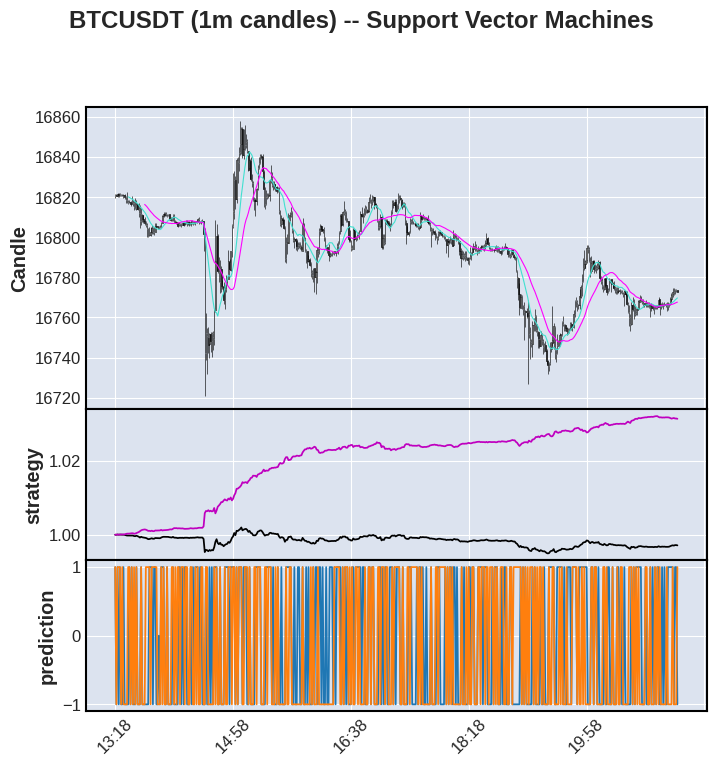

In [ ]:
def backtest(df,coin = 'BTC'):

  data = strat_compute(df)
  diff_rows = df['close'].shape[0] - data['strategy'].shape[0]

  'PLOTTING'
  ap = [
        mpl.make_addplot(data['market'],panel=1,type='line',color='k',ylabel='strategy',secondary_y=False),
        mpl.make_addplot(data['strategy'],panel=1,type='line',color='m',secondary_y=False),
        mpl.make_addplot(data['actual_sign'],panel=2,type='line',ylabel='prediction'),
        mpl.make_addplot(data['prediction'],panel=2,type='line',ylabel='prediction')
  ]

  mpl.plot(df[diff_rows:], title=coin+market+" ({} candles) -- Support Vector Machines".format(candles),\
          mav=(12,26),type='candle',ylabel='Candle',addplot=ap,panel_ratios=(2,1),\
          figratio=(1,1),figscale=1.5)


import mplfinance as mpl

candles = '1m'
coin = 'BTC'
market = 'USDT'

df=coinpair(coin, interval = candles, base=market)

backtest(df,coin)


22/22 [==============================] - 1s 3ms/step


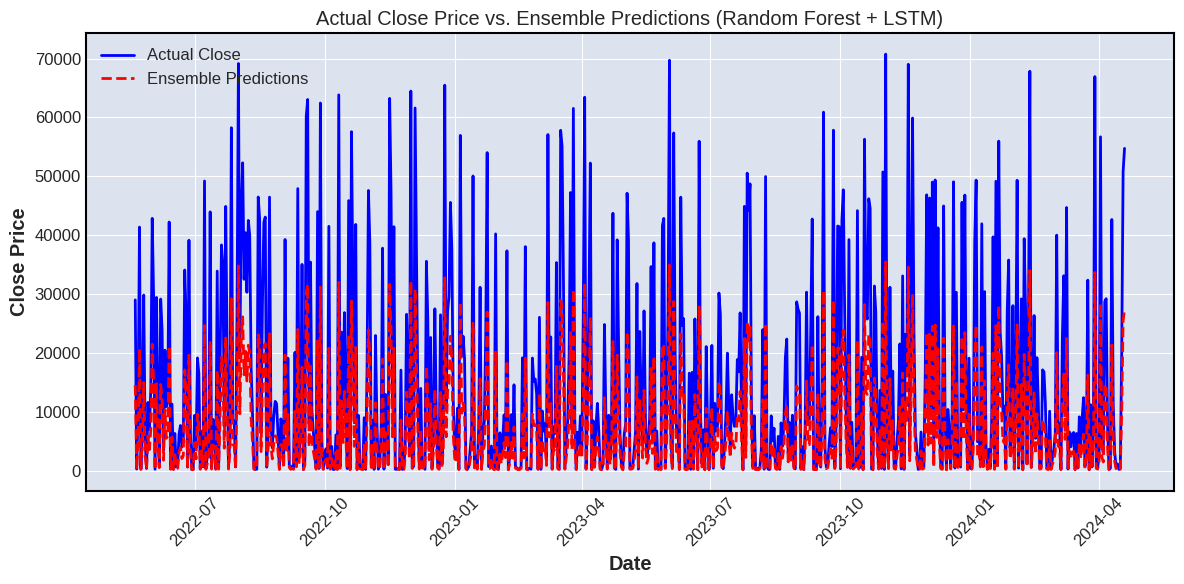

Random Forest RMSE: 39.03
LSTM RMSE: 23007.92
Ensemble RMSE: 11504.49


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load BTC-USD(6) dataset
df = pd.read_csv('/content/BTC-USD (6).csv')

# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Define features and target variable
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = df['Close'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Reshape input data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = create_lstm_model(input_shape=(1, X_train.shape[1]))
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)
lstm_preds = lstm_model.predict(X_test_lstm).flatten()

# Ensemble predictions
ensemble_preds = (rf_preds + lstm_preds) / 2

# Visualize ensemble predictions vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Close', color='blue', linestyle='-')
plt.plot(df.index[-len(y_test):], ensemble_preds, label='Ensemble Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Close Price vs. Ensemble Predictions (Random Forest + LSTM)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate RMSE for each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_preds))
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"LSTM RMSE: {lstm_rmse:.2f}")
print(f"Ensemble RMSE: {ensemble_rmse:.2f}")


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
BTC=pd.read_csv("/content/BTC-USD (6).csv")
BTC.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [ ]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3503 non-null   object 
 1   Open       3503 non-null   float64
 2   High       3503 non-null   float64
 3   Low        3503 non-null   float64
 4   Close      3503 non-null   float64
 5   Adj Close  3503 non-null   float64
 6   Volume     3503 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 191.7+ KB


In [ ]:
BTC.isnull()

Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
3498  False  False  False  False  False      False   False
3499  False  False  False  False  False      False   False
3500  False  False  False  False  False      False   False
3501  False  False  False  False  False      False   False
3502  False  False  False  False  False      False   False

[3503 rows x 7 columns]

In [ ]:
BTC.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
BTC.isnull().sum().sum()

0

In [ ]:
BTC.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
np.unique(BTC["Date"])

array(['2014-09-17', '2014-09-18', '2014-09-19', ..., '2024-04-17',
       '2024-04-18', '2024-04-19'], dtype=object)

In [ ]:
np.unique(BTC["Open"])

array([  176.897003,   200.050003,   207.834   , ..., 71632.5     ,
       72125.125   , 73079.375   ])

In [ ]:
np.unique(BTC["High"])

array([  211.731003,   215.240997,   216.727997, ..., 72850.710938,
       73637.476563, 73750.070313])

In [ ]:
np.unique(BTC["Low"])

array([  171.509995,   176.897003,   194.505997, ..., 69601.0625  ,
       69624.867188, 71334.09375 ])

In [ ]:
np.unique(BTC["Close"])

array([  178.102997,   199.259995,   208.097   , ..., 71631.359375,
       72123.90625 , 73083.5     ])

In [ ]:
np.unique(BTC["Volume"])

array([     5914570,      6491650,      7009320, ..., 123320567399,
       126358098747, 350967941479])

In [ ]:
BTC["Date"].value_counts()

Date
2014-09-17    1
2021-02-11    1
2021-01-31    1
2021-02-01    1
2021-02-02    1
             ..
2017-12-01    1
2017-12-02    1
2017-12-03    1
2017-12-04    1
2024-04-19    1
Name: count, Length: 3503, dtype: int64

In [ ]:
BTC["Open"].value_counts()

Open
376.756989      2
314.079010      2
17760.300781    2
233.421997      2
465.864014      1
               ..
11685.700195    1
11923.400391    1
14266.099609    1
17802.900391    1
63509.769531    1
Name: count, Length: 3499, dtype: int64

In [ ]:
BTC["High"].value_counts()

High
267.002991      2
6536.919922     2
244.251007      2
468.174011      1
48047.746094    1
               ..
11657.200195    1
12032.000000    1
14369.099609    1
17899.699219    1
65434.937500    1
Name: count, Length: 3500, dtype: int64

In [ ]:
BTC["Low"].value_counts()

Low
27375.601563    2
429.076996      2
452.421997      1
32064.814453    1
32270.175781    1
               ..
10905.099609    1
10862.000000    1
11081.799805    1
11604.599609    1
59698.507813    1
Name: count, Length: 3501, dtype: int64

In [ ]:
BTC["Close"].value_counts()

Close
6741.750000     2
1179.969971     2
236.153000      2
457.334015      1
47504.851563    1
               ..
11657.200195    1
11916.700195    1
14291.500000    1
17899.699219    1
64196.230469    1
Name: count, Length: 3500, dtype: int64

In [ ]:
BTC["Adj Close"].value_counts()

Adj Close
6741.750000     2
1179.969971     2
236.153000      2
457.334015      1
47504.851563    1
               ..
11657.200195    1
11916.700195    1
14291.500000    1
17899.699219    1
64196.230469    1
Name: count, Length: 3500, dtype: int64

In [ ]:
BTC["Volume"].value_counts()

Volume
21056800       1
81388911810    1
52754542671    1
61400400660    1
63088585433    1
              ..
6783119872     1
5138500096     1
6608309760     1
6132409856     1
49122557952    1
Name: count, Length: 3503, dtype: int64

In [ ]:
BTC.describe()

Open          High           Low         Close     Adj Close  \
count   3503.000000   3503.000000   3503.000000   3503.000000   3503.000000   
mean   15862.640057  16234.357660  15465.095446  15879.581017  15879.581017   
std    17585.866372  18010.016780  17116.274052  17600.420986  17600.420986   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%     1006.930023   1037.169983    983.025512   1009.639984   1009.639984   
50%     8667.577148   8836.841797   8395.107422   8668.120117   8668.120117   
75%    26751.385742  27129.300782  26347.219726  26759.723633  26759.723633   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.503000e+03  
mean   1.712388e+10  
std    1.929255e+10  
min    5.914570e+06  
25%    2.086470e+08  
50%    1.275271e+10  
75%    2.766343e+10  
max    3.509679e+11

In [ ]:
BTC_NEW=BTC.dropna(axis = 0)
BTC_NEW

Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
3498  2024-04-15  65739.648438  66878.648438  62332.070313  63426.210938   
3499  2024-04-16  63419.296875  64355.667969  61716.402344  63811.863281   
3500  2024-04-17  63831.847656  64486.363281  59768.585938  61276.691406   
3501  2024-04-18  61275.316406  64125.687500  60833.480469  63512.753906   
3502  2024-04-19  63509.769531  65434.937500  59698.507813  64196.230469   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002     34483200  
2       394.795990     37919700  
3       408.903992     36863600  
4       398.821014     26580100  
...            ...          ...  
3498  63426.210938  43595917654  
3499  63811.863281  42847528078  
3500  61276.691406  41915247049  
3501  63512.753906  36006307335  
3502  64196.230469  49122557952  

[3503 rows x 7 columns]

In [ ]:
BTC_NEW.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

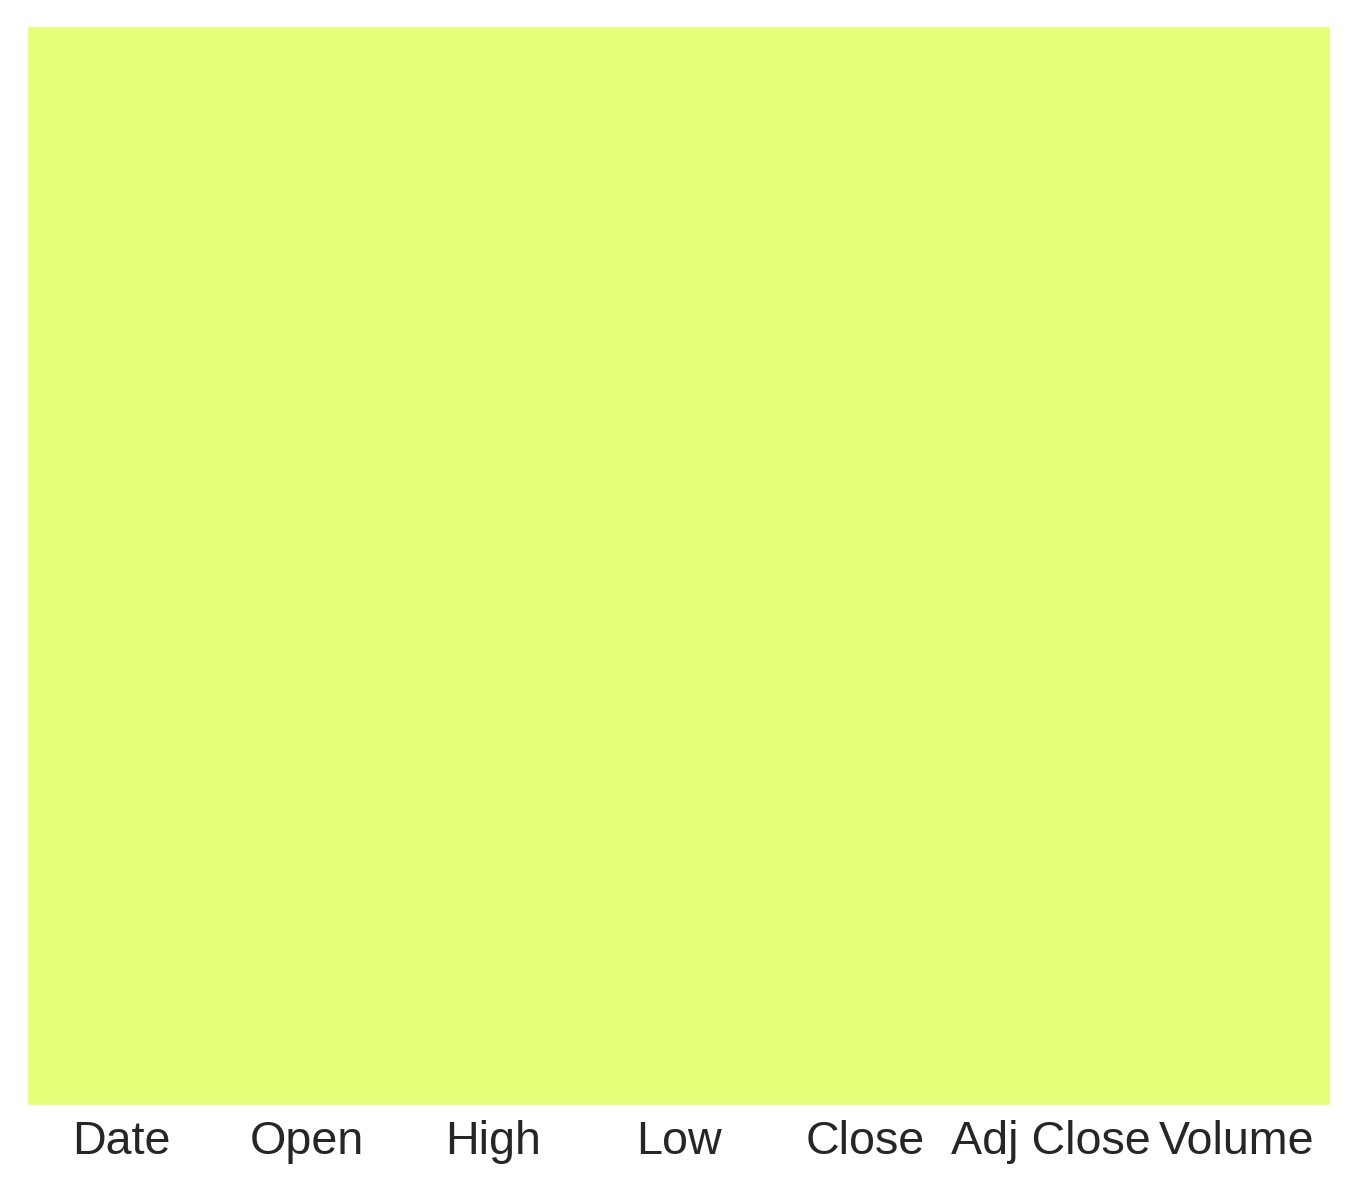

In [ ]:
fig=plt.figure(figsize=(6,5),dpi=280)
sns.heatmap(BTC_NEW.isnull(), yticklabels=False, cbar=False, cmap='Wistia')
plt.show()

In [ ]:
BTC_NEW.describe()

Open          High           Low         Close     Adj Close  \
count   3503.000000   3503.000000   3503.000000   3503.000000   3503.000000   
mean   15862.640057  16234.357660  15465.095446  15879.581017  15879.581017   
std    17585.866372  18010.016780  17116.274052  17600.420986  17600.420986   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%     1006.930023   1037.169983    983.025512   1009.639984   1009.639984   
50%     8667.577148   8836.841797   8395.107422   8668.120117   8668.120117   
75%    26751.385742  27129.300782  26347.219726  26759.723633  26759.723633   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.503000e+03  
mean   1.712388e+10  
std    1.929255e+10  
min    5.914570e+06  
25%    2.086470e+08  
50%    1.275271e+10  
75%    2.766343e+10  
max    3.509679e+11

In [ ]:
BTC_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3503 non-null   object 
 1   Open       3503 non-null   float64
 2   High       3503 non-null   float64
 3   Low        3503 non-null   float64
 4   Close      3503 non-null   float64
 5   Adj Close  3503 non-null   float64
 6   Volume     3503 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 191.7+ KB


In [ ]:
BTC_NEW['Date']=pd.to_datetime(BTC_NEW['Date'])

In [ ]:
print(f'DataFrame contains Bitcoin Prices between {BTC_NEW.Date.min()} {BTC_NEW.Date.max()}')
print(f'Total Days = {(BTC_NEW.Date.max()- BTC_NEW.Date.min()).days} days')

DataFrame contains Bitcoin Prices between 2014-09-17 00:00:00 2024-04-19 00:00:00
Total Days = 3502 days


<Axes: >

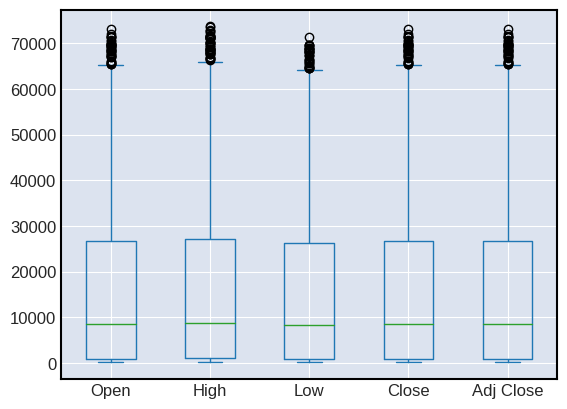

In [ ]:
BTC_NEW[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
layout = go.Layout(
    title='Bitcoin Price Prediction',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
BTC_DATA = [{'x':BTC_NEW['Date'], 'y':BTC_NEW['Close']}]
plot = go.Figure(data=BTC_DATA, layout=layout)

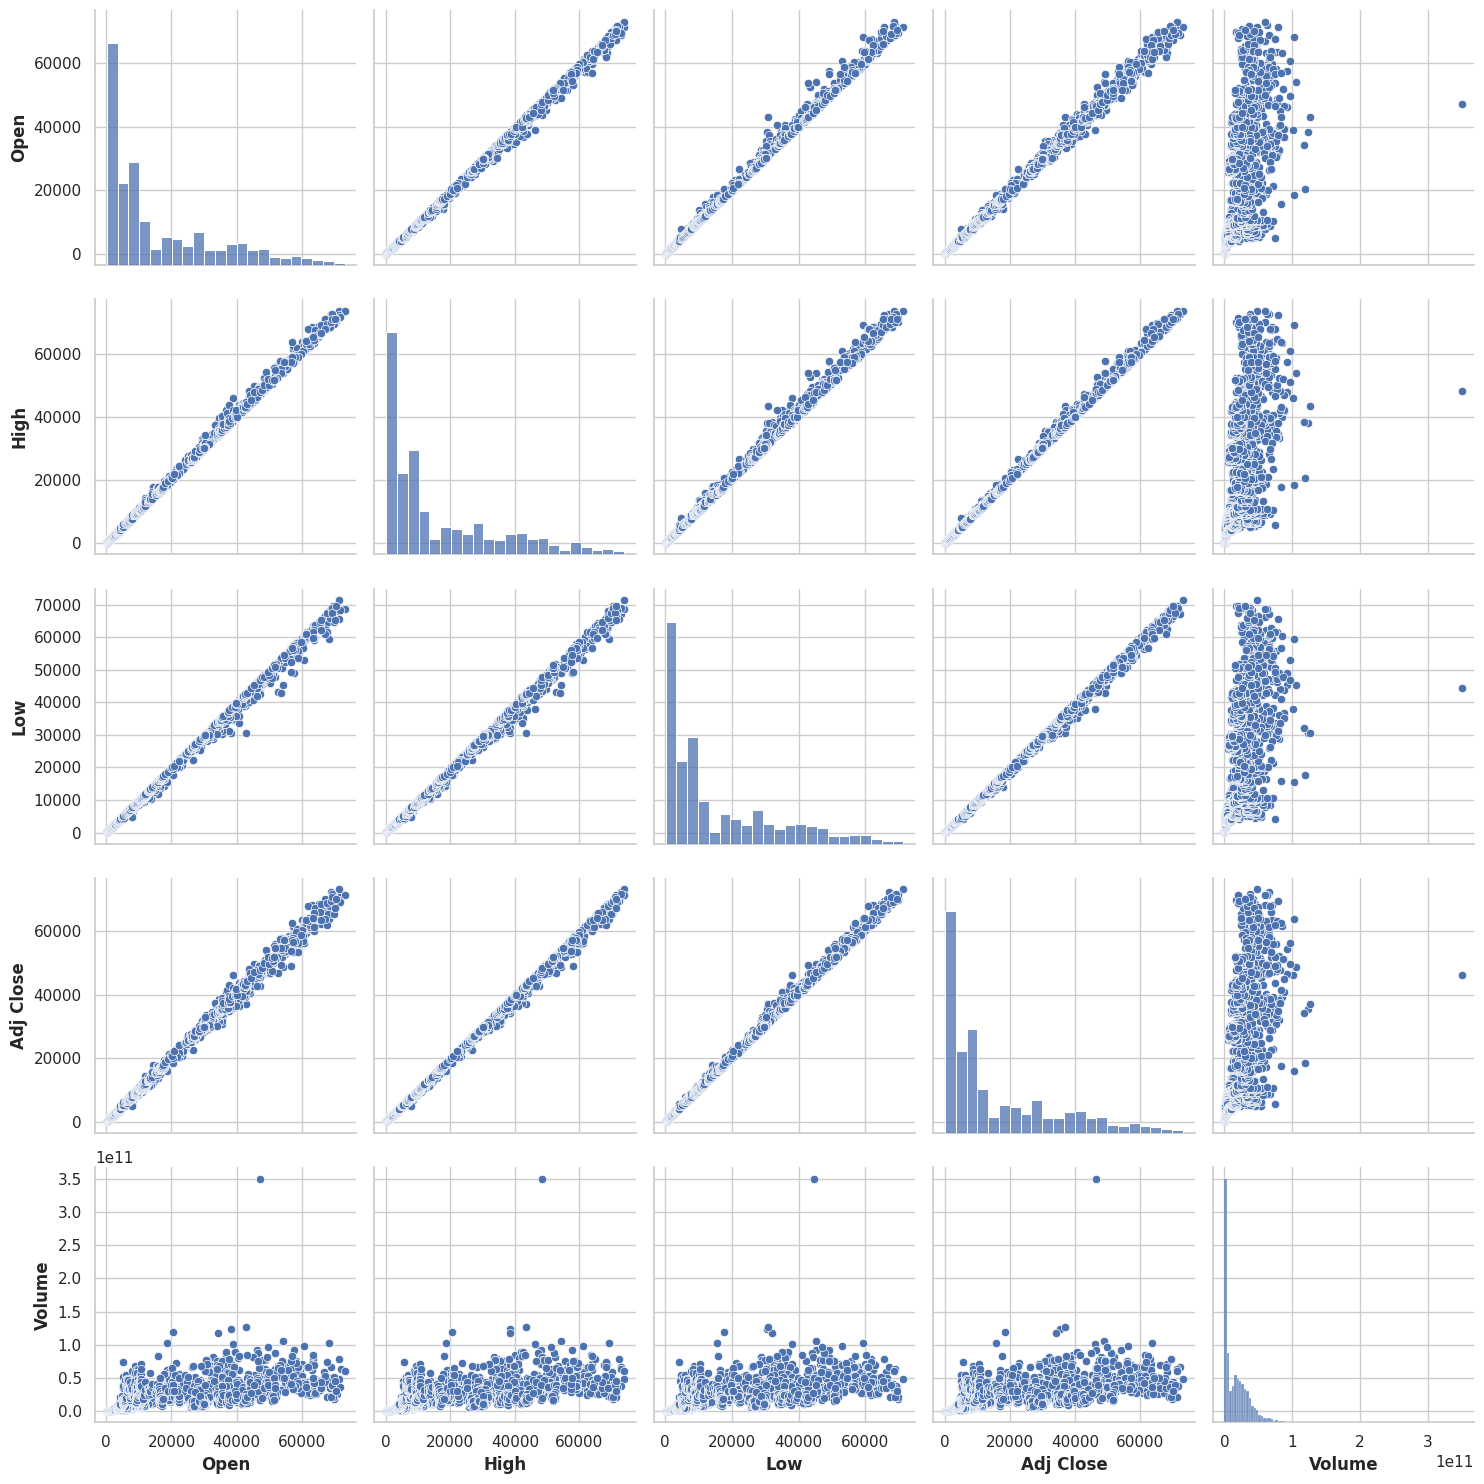

In [ ]:
#fig=plt.figure(figsize=(2,2))
sns.set(style='whitegrid',context='notebook')
cols=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']
sns.pairplot(BTC_NEW[cols],size=3)
plt.tight_layout()
plt.show()

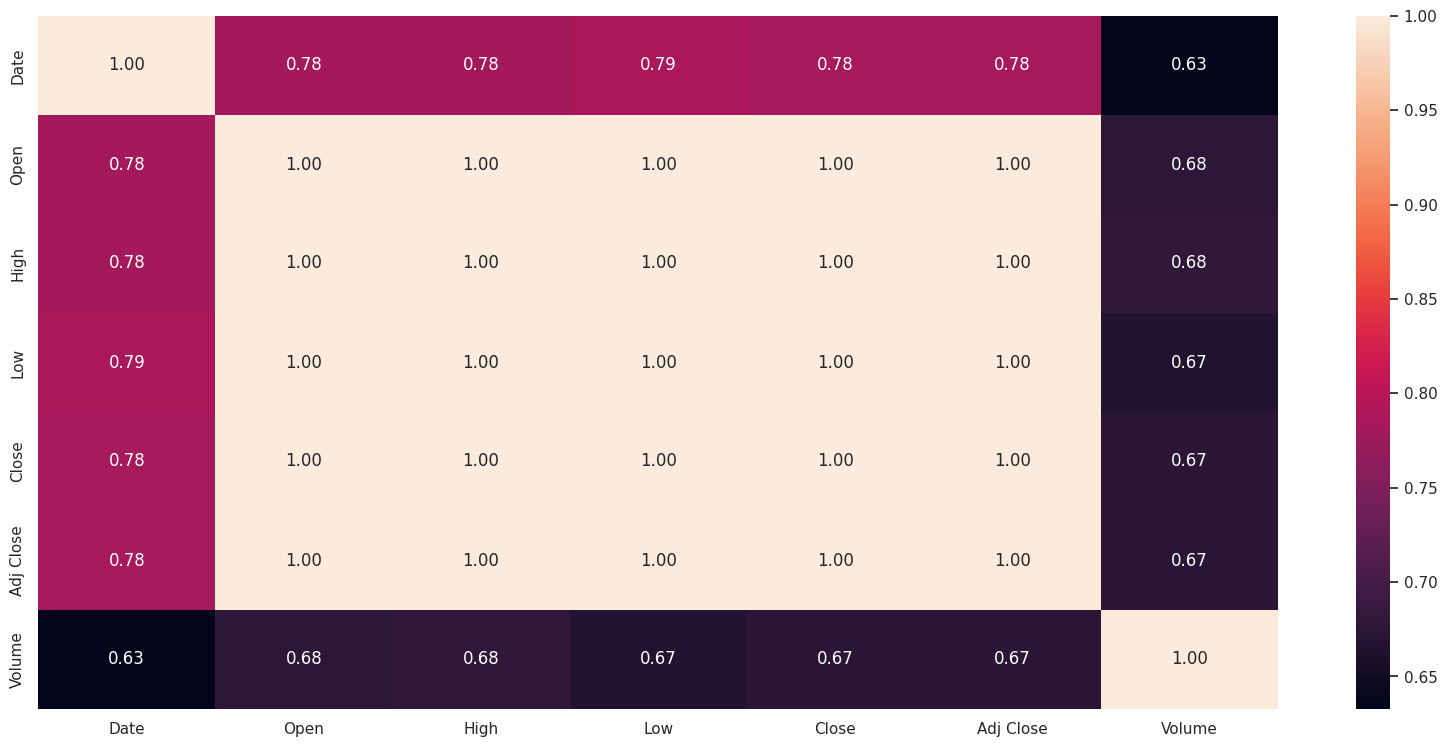

In [ ]:
import seaborn as sns
corr = BTC_NEW.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
X= np.array(BTC_NEW.index).reshape(-1,1)
Y= BTC_NEW['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)


In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Model.score(X_train, Y_train)

0.6109647156646305

In [ ]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = Model.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

BTC_DATA = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=BTC_DATA, layout=layout)

In [ ]:
Accuracy_With_LiearRegression = Model.score(X_train, Y_train)
Accuracy_With_LiearRegression

0.6109647156646305

In [ ]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, Model.predict(X_train))}\t{r2_score(Y_test, Model.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, Model.predict(X_train))}\t{mse(Y_test, Model.predict(X_test))}
'''

print(scores)


Metric           Train                Test        
r2_score  0.6109647156646305	0.620425152360507
MSE       124926214.16303782	107172623.78051509



In [ ]:
print(f'Accucary of Bitcoin Price Prediction using Linear Regression is', Accuracy_With_LiearRegression)

Accucary of Bitcoin Price Prediction using Linear Regression is 0.6109647156646305


In [ ]:
x = BTC_NEW[['Open', 'High', 'Low', 'Adj Close']].values
y = BTC_NEW[["Close"]].values

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def polynomialRegression(degree):

    x= np.array(BTC_NEW.index).reshape(-1,1)
    y= BTC_NEW['Close']



    quadratic_featurizer = PolynomialFeatures(degree)
    x_quadratic = quadratic_featurizer.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x_quadratic,y,test_size=0.3, random_state=0)

    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(x_train, y_train)

    print('Residual sum of squares train: %.2f' % np.mean((regressor_quadratic.predict(x_train)- y_train) ** 2))
    print('Residual sum of squares test: %.2f' % np.mean((regressor_quadratic.predict(x_test)- y_test) ** 2))

In [ ]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [ ]:
i = interact(polynomialRegression, degree=(1,100))

interactive(children=(IntSlider(value=50, description='degree', min=1), Output()), _dom_classes=('widget-inter…

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
BTC= pd.read_csv("/content/BTC-USD (6).csv")
BTC = BTC.dropna()
BTC = BTC[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
BTC.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [ ]:
BTC.describe()

Open          High           Low         Close     Adj Close  \
count   3503.000000   3503.000000   3503.000000   3503.000000   3503.000000   
mean   15862.640057  16234.357660  15465.095446  15879.581017  15879.581017   
std    17585.866372  18010.016780  17116.274052  17600.420986  17600.420986   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%     1006.930023   1037.169983    983.025512   1009.639984   1009.639984   
50%     8667.577148   8836.841797   8395.107422   8668.120117   8668.120117   
75%    26751.385742  27129.300782  26347.219726  26759.723633  26759.723633   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.503000e+03  
mean   1.712388e+10  
std    1.929255e+10  
min    5.914570e+06  
25%    2.086470e+08  
50%    1.275271e+10  
75%    2.766343e+10  
max    3.509679e+11

In [ ]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3503 non-null   object 
 1   Open       3503 non-null   float64
 2   High       3503 non-null   float64
 3   Low        3503 non-null   float64
 4   Close      3503 non-null   float64
 5   Adj Close  3503 non-null   float64
 6   Volume     3503 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 191.7+ KB


In [ ]:
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
layout = go.Layout(
    title='Bitcoin Price Prediction',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
BTC_DATA = [{'x':BTC['Date'], 'y':BTC['Close']}]
plot = go.Figure(data=BTC_DATA, layout=layout)

In [ ]:
BTC['Open-Close']= BTC.Close - BTC.Open
BTC['High-Low']  = BTC.High - BTC.Low
BTC = BTC.dropna()
X= BTC[['Open-Close', 'High-Low']]
X.head()

Open-Close   High-Low
0   -8.529999  15.752014
1  -32.419983  43.755981
2  -29.307007  43.302978
3   14.230988  33.412994
4   -9.263977  19.244995

In [ ]:
Y= np.where(BTC['Close'].shift(-1)>BTC['Close'],1,-1)

In [ ]:
split_percentage = 0.7
split = int(split_percentage*len(BTC))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [ ]:
model = LogisticRegression()
model = model.fit (X_train,Y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

0                          1
0  Open-Close  [-0.00010935445143393006]
1    High-Low   [-3.856267531083446e-05]

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.4210463  0.5789537 ]
 [0.44361079 0.55638921]
 [0.47039004 0.52960996]
 ...
 [0.42675117 0.57324883]
 [0.54339031 0.45660969]
 [0.52464214 0.47535786]]


In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))

[[ 65 463]
 [ 61 462]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.52      0.12      0.20       528
           1       0.50      0.88      0.64       523

    accuracy                           0.50      1051
   macro avg       0.51      0.50      0.42      1051
weighted avg       0.51      0.50      0.42      1051



In [ ]:
print(model.score(X_test,Y_test))

0.5014272121788773


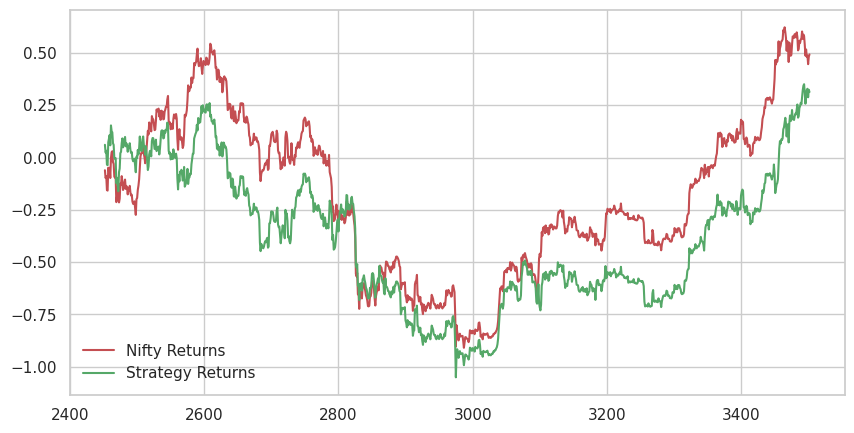

In [ ]:
BTC['Predicted_Signal'] = model.predict(X)
BTC['Nifty_returns'] = np.log(BTC['Close']/BTC['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(BTC[split:]['Nifty_returns'])

BTC['Startegy_returns'] = BTC['Nifty_returns']* BTC['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(BTC[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [ ]:
print('Accuracy of Bitcoin_Price_Prediction using Logistic Regression ',model.score(X_test,Y_test))

Accuracy of Bitcoin_Price_Prediction using Logistic Regression  0.5014272121788773


In [ ]:
cross_val = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=100)
print('Accuracy of Bitcoin_Price_Prediction after Cross_validation')
print(cross_val)
print(cross_val.mean())

Accuracy of Bitcoin_Price_Prediction after Cross_validation
[0.52777778 0.52777778 0.52777778 0.51428571 0.51428571 0.51428571
 0.51428571 0.51428571 0.51428571 0.51428571 0.51428571 0.51428571
 0.51428571 0.51428571 0.51428571 0.51428571 0.51428571 0.51428571
 0.51428571 0.51428571 0.51428571 0.51428571 0.51428571 0.51428571
 0.51428571 0.51428571 0.51428571 0.51428571 0.51428571 0.51428571
 0.6        0.57142857 0.51428571 0.51428571 0.51428571 0.51428571
 0.42857143 0.45714286 0.51428571 0.51428571 0.48571429 0.51428571
 0.51428571 0.51428571 0.51428571 0.62857143 0.57142857 0.54285714
 0.54285714 0.54285714 0.54285714 0.54285714 0.54285714 0.54285714
 0.54285714 0.54285714 0.54285714 0.54285714 0.57142857 0.54285714
 0.57142857 0.57142857 0.65714286 0.77142857 0.68571429 0.65714286
 0.71428571 0.6        0.48571429 0.57142857 0.62857143 0.57142857
 0.45714286 0.42857143 0.45714286 0.54285714 0.45714286 0.51428571
 0.45714286 0.48571429 0.45714286 0.45714286 0.45714286 0.45714286
 0

In [ ]:
BTC['Open-Close']= BTC.Close - BTC.Open
BTC['High-Low']  = BTC.High - BTC.Low
BTC = BTC.dropna()
X= BTC[['Open-Close', 'High-Low']]
X.head()

Open-Close   High-Low
1  -32.419983  43.755981
2  -29.307007  43.302978
3   14.230988  33.412994
4   -9.263977  19.244995
5    3.052002   9.785980

In [ ]:
Y= np.where(BTC['Close'].shift(-1)>BTC['Close'],1,-1)

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(BTC))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, Y, cv=10))

In [ ]:
print(scores[0])

[0.45299145 0.4957265  0.46       0.53142857 0.50857143 0.52857143
 0.44571429 0.47714286 0.50857143 0.48857143]


In [ ]:
print(scores[1])

[0.48148148 0.49287749 0.45714286 0.46       0.48857143 0.49142857
 0.49142857 0.5        0.49142857 0.51428571]


In [ ]:
rfc = RandomForestClassifier(n_estimators=16)

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.52      0.49      0.50       356
           1       0.50      0.53      0.51       345

    accuracy                           0.51       701
   macro avg       0.51      0.51      0.51       701
weighted avg       0.51      0.51      0.51       701



In [ ]:
print(confusion_matrix(Y_test, rfc_pred))

[[175 181]
 [163 182]]


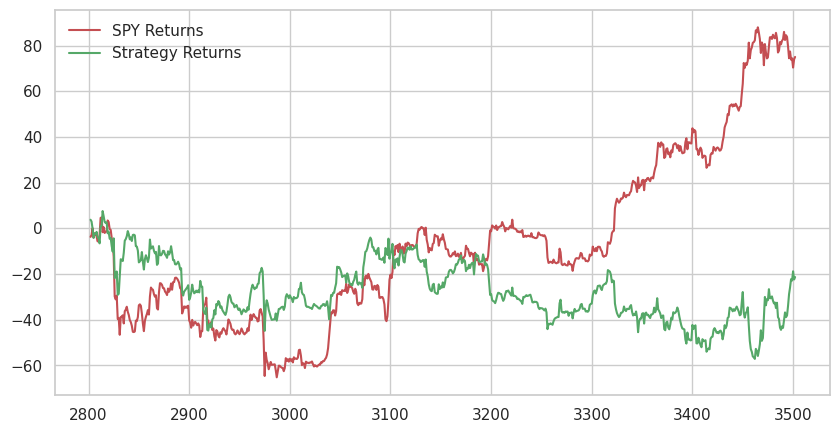

In [ ]:
BTC['Predicted_Signal'] = rfc.predict(X)

BTC['SPY_returns'] = np.log(BTC['Close']/BTC['Close'].shift(1))
Cumulative_SPY_returns = BTC[split:]['SPY_returns'].cumsum()*100

BTC['Startegy_returns'] = BTC['SPY_returns']* BTC['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = BTC[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [ ]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -1.65


In [ ]:
model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.8125 0.1875]
 [0.5    0.5   ]
 [0.3125 0.6875]
 ...
 [0.875  0.125 ]
 [0.375  0.625 ]
 [0.75   0.25  ]]


In [ ]:
predicted = rfc.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))

[[188 168]
 [175 170]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.52      0.53      0.52       356
           1       0.50      0.49      0.50       345

    accuracy                           0.51       701
   macro avg       0.51      0.51      0.51       701
weighted avg       0.51      0.51      0.51       701



In [ ]:
print(model.score(X_train,Y_train))

0.9839343091752946


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline
%matplotlib inline

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Populating the interactive namespace from numpy and matplotlib
DecisionTreeClassifier()
Train_data Accuracy: 1.00
Test_data Accuracy: 0.51


In [ ]:
model.score(X_train, Y_train)

1.0

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
predicted = model.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, predicted))

[[154 202]
 [144 201]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.52      0.43      0.47       356
           1       0.50      0.58      0.54       345

    accuracy                           0.51       701
   macro avg       0.51      0.51      0.50       701
weighted avg       0.51      0.51      0.50       701



In [ ]:
print(model.score(X_train,Y_train))

1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [ ]:
pipe_line = Pipeline([('clf', DecisionTreeClassifier())])

In [ ]:
pipe_line.fit(X_train, Y_train)

Pipeline(steps=[('clf', DecisionTreeClassifier())])

In [ ]:
pipe_line.score(X_train, Y_train)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=pipe_line, X=X, y=Y, cv=10)
print('cv accuracy score : %s' % score)
print('cv accuracy : %.3f +/- %.3f' % (np.mean(score), np.std(score)))

cv accuracy score : [0.48717949 0.45299145 0.50285714 0.52285714 0.48       0.5
 0.49714286 0.45142857 0.50285714 0.47142857]
cv accuracy : 0.487 +/- 0.022


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate the KNeighborsClassifier with the desired number of neighbors
knn = KNeighborsClassifier(n_neighbors=15)

# Fit the classifier on the training data
knn.fit(X_train, Y_train)

# Calculate accuracy on the training set
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
print("Training Accuracy:", accuracy_train)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
print("Test Accuracy:", accuracy_test)


Training Accuracy: 0.6115672973937879
Test Accuracy: 0.5221112696148359


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'BTC' is your DataFrame containing the relevant data
# Define 'split' as the point where you want to split your data
split = 100  # Example: Split at index 100

# Compute SPY returns and cumulative returns
BTC['SPY_returns'] = np.log(BTC['Close'] / BTC['Close'].shift(1))
Cumulative_SPY_returns = BTC['SPY_returns'][split:].cumsum() * 100

# Calculate strategy returns based on predicted signals
BTC['Strategy_returns'] = BTC['SPY_returns'] * BTC['Predicted_Signal'].shift(1)

# Plotting the cumulative returns
Cumulative_Strategy_returns = BTC['Strategy_returns'][split:].cumsum() * 100

# You can then proceed with plotting or further analysis using Cumulative_SPY_returns and Cumulative_Strategy_returns


In [ ]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 1.63


In [ ]:
model = knn.fit(X_train, Y_train)
model = model.fit (X_train,Y_train)

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.33333333 0.66666667]
 [0.53333333 0.46666667]
 [0.33333333 0.66666667]
 ...
 [0.6        0.4       ]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # Import LinearRegression class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Your existing code continues here...

# Example usage of LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Continue with the rest of your code...


LinearRegression()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Assuming you have already loaded and preprocessed your data
# Example: Splitting your data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(...)

# Assuming you have defined X_train, X_test, Y_train, and Y_test
# and you have imported LinearRegression as shown above

# Create an instance of LinearRegression
linear_model = LinearRegression()

# Fit the model using the training data
linear_model.fit(X_train, Y_train)

# Now you can use the model to make predictions or evaluate performance
# For example:
train_score = linear_model.score(X_train, Y_train)
test_score = linear_model.score(X_test, Y_test)

# Print the model's performance
print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

# Continue with the rest of your code...


Training R^2 score: 0.0019614837508765692
Testing R^2 score: -0.003541682877029162


22/22 [==============================] - 3s 4ms/step


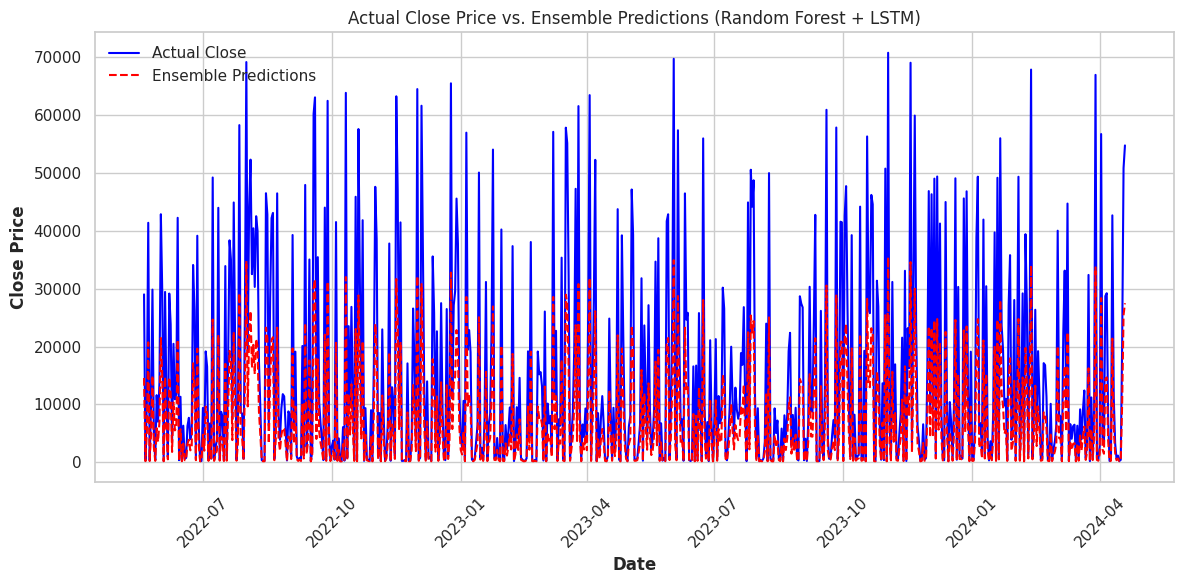

Random Forest RMSE: 39.03
LSTM RMSE: 23009.24
Ensemble RMSE: 11505.14


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load BTC-USD(6) dataset
df = pd.read_csv('/content/BTC-USD (6).csv')

# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Define features and target variable
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = df['Close'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Reshape input data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = create_lstm_model(input_shape=(1, X_train.shape[1]))
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)
lstm_preds = lstm_model.predict(X_test_lstm).flatten()

# Ensemble predictions
ensemble_preds = (rf_preds + lstm_preds) / 2

# Visualize ensemble predictions vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Close', color='blue', linestyle='-')
plt.plot(df.index[-len(y_test):], ensemble_preds, label='Ensemble Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Close Price vs. Ensemble Predictions (Random Forest + LSTM)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate RMSE for each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_preds))
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"LSTM RMSE: {lstm_rmse:.2f}")
print(f"Ensemble RMSE: {ensemble_rmse:.2f}")


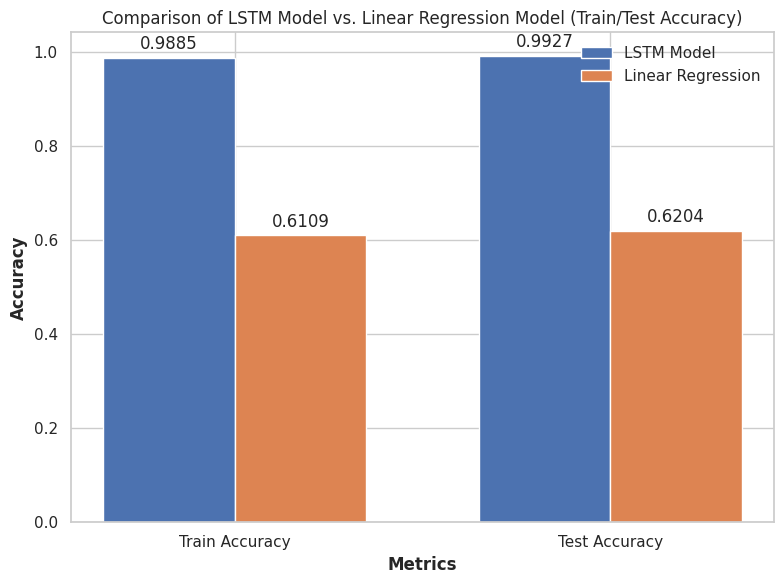

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics (Train and Test Accuracy) and models
metrics = ['Train Accuracy', 'Test Accuracy']
lstm_values = [0.9885, 0.9927]
lr_values = [0.6109, 0.6204]

# Set positions for bars
x = np.arange(len(metrics))
width = 0.35  # Width of the bars

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, lstm_values, width, label='LSTM Model')
rects2 = ax.bar(x + width/2, lr_values, width, label='Linear Regression')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of LSTM Model vs. Linear Regression Model (Train/Test Accuracy)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Display the values on top of the bars
autolabel(rects1)
autolabel(rects2)

# Show plot
plt.tight_layout()
plt.show()


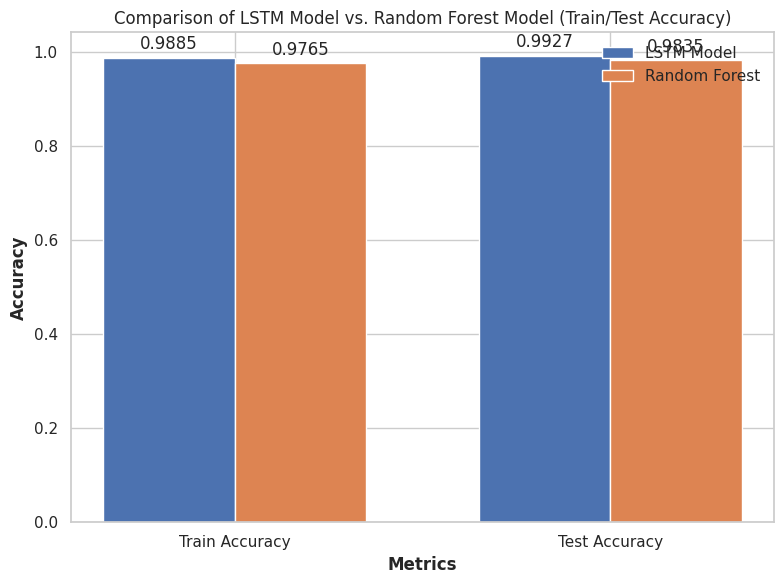

In [ ]:
import numpy as np

# Define the metrics (Train and Test Accuracy) and models
metrics = ['Train Accuracy', 'Test Accuracy']
lstm_values = [0.9885, 0.9927]
rf_values = [0.9765, 0.9835]

# Set positions for bars
x = np.arange(len(metrics))
width = 0.35  # Width of the bars

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, lstm_values, width, label='LSTM Model')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of LSTM Model vs. Random Forest Model (Train/Test Accuracy)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Display the values on top of the bars
autolabel(rects1)
autolabel(rects2)

# Show plot
plt.tight_layout()
plt.show()


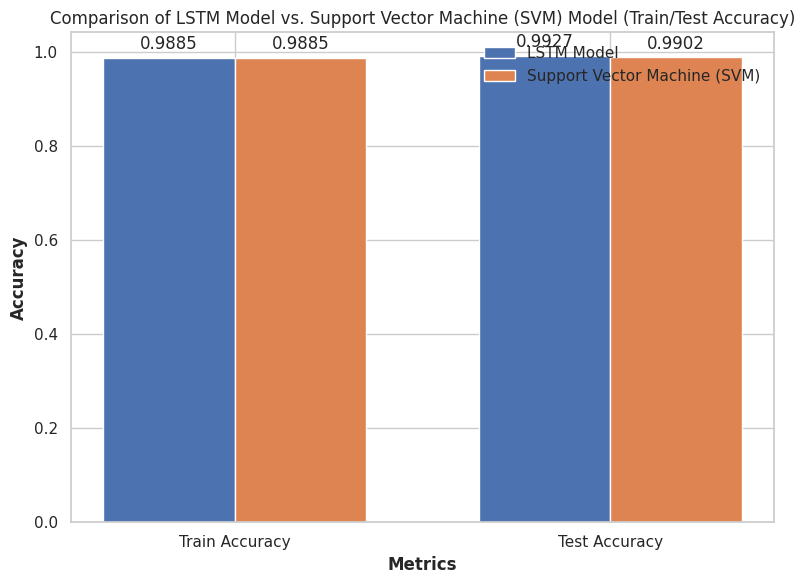

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics (Train and Test Accuracy) and models
metrics = ['Train Accuracy', 'Test Accuracy']
lstm_values = [0.9885, 0.9927]
svm_values = [0.9885, 0.9902]

# Set positions for bars
x = np.arange(len(metrics))
width = 0.35  # Width of the bars

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, lstm_values, width, label='LSTM Model')
rects2 = ax.bar(x + width/2, svm_values, width, label='Support Vector Machine (SVM)')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of LSTM Model vs. Support Vector Machine (SVM) Model (Train/Test Accuracy)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Display the values on top of the bars
autolabel(rects1)
autolabel(rects2)

# Show plot
plt.tight_layout()
plt.show()
